In [1]:
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import pickle, os, gc, re, sys

sns.set();
sns.set_palette("colorblind")

from IPython.display import display, display_html, HTML
from IPython.core.debugger import set_trace
# plt.rcParams["axes.grid"] = False

import Jupyter_module_loader
# sys.path.insert(1, '/path/to/application/app/folder')
from utility import *
# import gaussian_kde

# import warnings
# warnings.filterwarnings('ignore')

import holoviews as hv
from holoviews import opts

encoding = "ISO-8859-1"

# you should clone this git to a subdirectory called 'BES_analysis_code' (in some directory - I call it BES_analysis - doesn't matter though)
# %matplotlib inline



In [2]:
dataset_folder = "C:\\Users\\Marios\\Documents\\GitHub\\Thomas Prosser project\\datasets\\"
output_folder = "C:\\Users\\Marios\\Documents\\GitHub\\Thomas Prosser project\\output\\"

In [3]:
CSES_int = pd.read_stata(dataset_folder + "CSES"+os.sep+"integrated 1-4"+os.sep+"cses_imd.dta")

## 1996-2016 (Modules 1-4)

CSES_5 = pd.read_stata(dataset_folder + "CSES"+os.sep+"module 5"+os.sep+"cses5.dta")
CSES_4 = pd.read_stata(dataset_folder + "CSES"+os.sep+"module 4"+os.sep+"cses4.dta")
CSES_3 = pd.read_stata(dataset_folder + "CSES"+os.sep+"module 3"+os.sep+"cses3.dta")
CSES_2 = pd.read_stata(dataset_folder + "CSES"+os.sep+"module 2"+os.sep+"cses2.dta")
CSES_1 = pd.read_stata(dataset_folder + "CSES"+os.sep+"module 1"+os.sep+"cses1.dta")


In [4]:
df_mod1_matches = pd.read_pickle(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"df_mod1_matches.zip")
df_mod2_matches = pd.read_pickle(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"df_mod2_matches.zip")
df_mod3_matches = pd.read_pickle(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"df_mod3_matches.zip")
df_mod4_matches = pd.read_pickle(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"df_mod4_matches.zip")

In [5]:
CSES_int.describe()

,IMD1008_YEAR,IMD1010_1,IMD1010_2,IMD1010_3
count,281083.000000,281083.000000,281083.000000,281083.000000
mean,2005.987178,1.000000,1.000001,1.000000
std,5.736276,0.339937,0.392222,0.342524
min,1996.000000,0.003300,0.000000,0.000000
25%,2001.000000,1.000000,0.928000,1.000000
50%,2006.000000,1.000000,1.000000,1.000000
75%,2011.000000,1.000000,1.000000,1.000000
max,2016.000000,11.062100,23.055600,49.135500


In [6]:
CSES_int.select_dtypes(exclude='category').dtypes.value_counts()

object     9
float64    3
int16      1
dtype: int64

In [7]:
CSES_int.select_dtypes(exclude='category')

,IMD1001,IMD1002_VER,IMD1002_DOI,IMD1004,IMD1005,IMD1006,IMD1006_UN,IMD1006_NAM,IMD1008_YEAR,IMD1008_RES,IMD1010_1,IMD1010_2,IMD1010_3
0,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,ALB_2005,008020050000001111,0080,008,Albania,2005,0000001111,1.0,1.0000,1.0
1,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,ALB_2005,008020050000001112,0080,008,Albania,2005,0000001112,1.0,1.0000,1.0
2,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,ALB_2005,008020050000001113,0080,008,Albania,2005,0000001113,1.0,1.0000,1.0
3,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,ALB_2005,008020050000001114,0080,008,Albania,2005,0000001114,1.0,1.0000,1.0
4,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,ALB_2005,008020050000001115,0080,008,Albania,2005,0000001115,1.0,1.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281078,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,ZAF_2014,710020140000001296,7100,710,South Africa,2014,0000001296,1.0,0.8473,1.0
281079,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,ZAF_2014,710020140000001297,7100,710,South Africa,2014,0000001297,1.0,1.0853,1.0
281080,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,ZAF_2014,710020140000001298,7100,710,South Africa,2014,0000001298,1.0,0.5586,1.0
281081,CSES-IMD,VER2019-OCT-17,doi:10.7804/cses.imd.2019-10-17,ZAF_2014,710020140000001299,7100,710,South Africa,2014,0000001299,1.0,0.9397,1.0


In [8]:
# IMD1005 is the unique ID

CSES_int["IMD1005"].value_counts()

# appears to be COUNTRY + YEAR + RESP

643020000000001755    1
643020000000000914    1
410020040000001047    1
764020110000000367    1
484020000000001318    1
                     ..
100020140006114017    1
203020130000001121    1
376019960000009001    1
724019960000000662    1
124020150000026249    1
Name: IMD1005, Length: 281083, dtype: int64

In [9]:

(CSES_int["IMD1006"]+CSES_int["IMD1008_RES"]).value_counts().value_counts()

# Respondents appear to mostly be polled just once, but a small slice get polled up to 5 times


1    141365
2     27307
3     11212
4      7677
5      4152
dtype: int64

https://partyfacts.herokuapp.com/data/cses/
    
Import
Party information were extracted from the codebook part 3 (no script provided)
share information are gathered by the variable IMD3002_LH_PL
Comments
The dataset covers the years 1996 to 2016. To see which countries are covered in which year, please visit the website of CSES. http://www.cses.org/electionstudies.htm
Update
We have updated the CSES (IMD) data. The nine most relevant parties according to the CSES of each election are included as long as they comply with the coding rules of Party Facts. In the previous version some countries were completely missing, we fixed this bug.    
    

In [10]:
CSES_int["IMD3002_LH_PL"]

0         0080005. ALB - Social Democratic Party
1                0080002. ALB - Democratic Party
2         0080005. ALB - Social Democratic Party
3                  9999997. VOLUNTEERED: REFUSED
4                0080002. ALB - Democratic Party
                           ...                  
281078        7100002. ZAF - Democratic Alliance
281079        7100002. ZAF - Democratic Alliance
281080             9999997. VOLUNTEERED: REFUSED
281081             9999997. VOLUNTEERED: REFUSED
281082        7100002. ZAF - Democratic Alliance
Name: IMD3002_LH_PL, Length: 281083, dtype: category
Categories (870, object): [0080001. ALB - Socialist Party < 0080002. ALB - Democratic Party < 0080003. ALB - Socialist Movement for Integration < 0080004. ALB - Republican Party ... 9999996. NOT APPLICABLE: NO LOWER HOUSE ELECTION < 9999997. VOLUNTEERED: REFUSED < 9999998. VOLUNTEERED: DON'T KNOW < 9999999. MISSING/ABSTAINED (DID NOT VOTE)]

In [11]:
# IMD1001+: IDENTIFICATION, WEIGHT, AND STUDY ADMINISTRATION DATA
# IMD2001+: Age/gender/education/marital/religion/household inc/rural-urban


# 2. SECOND HOUSEHOLD INCOME QUINTILE     48378
# 3. THIRD HOUSEHOLD INCOME QUINTILE      47890
# 1. LOWEST HOUSEHOLD INCOME QUINTILE     44880
# 4. FOURTH HOUSEHOLD INCOME QUINTILE     43130
# 5. HIGHEST HOUSEHOLD INCOME QUINTILE    40232
# 9. MISSING                              27056
# 7. VOLUNTEERED: REFUSED                 15822
# 8. VOLUNTEERED: DON'T KNOW              13620
# 6. [SEE ELECTION STUDY NOTES]              75

In [12]:
## all of the IMD3001 variables are
# "CSES IMD VARIABLES: MICRO-LEVEL (SURVEY) DATA"
# whole bunch of vote choice, partyid, pref, closest to
# left-right/like-dislike party/like-dislike party leader (self/top 9 parties)
# 

# IMD3001

In [13]:
## All of the IMD5000 are:
#  CSES IMD VARIABLES: MACRO-LEVEL DATA
# party identifiers (PARTY_A ==?)
# party/country level electoral results
# party level measures


# -> half to PARTY-YEAR data, half to COUNTRY-YEAR data

In [14]:
CSES_int["IMD5000_A"]
# 107 different parties

0                  0080002. ALB - Democratic Party
1                  0080002. ALB - Democratic Party
2                  0080002. ALB - Democratic Party
3                  0080002. ALB - Democratic Party
4                  0080002. ALB - Democratic Party
                            ...                   
281078    7100001. ZAF - African National Congress
281079    7100001. ZAF - African National Congress
281080    7100001. ZAF - African National Congress
281081    7100001. ZAF - African National Congress
281082    7100001. ZAF - African National Congress
Name: IMD5000_A, Length: 281083, dtype: category
Categories (107, object): [0080002. ALB - Democratic Party < 0320001. ARG - Front for the Victory < 0360001. AUS - Liberal Party < 0360003. AUS - Australian Labor Party ... 8260002. GBR - Labour < 8400001. USA - Republican Party < 8400002. USA - Democratic Party < 8580001. URY - Broad Front]

In [15]:
partyfacts_core_parties = pd.read_csv(dataset_folder+"PartyFacts"+os.sep+ "partyfacts-core-parties.csv")
partyfacts_external_parties = pd.read_csv(dataset_folder+"PartyFacts"+os.sep+ "partyfacts-external-parties.csv")
partyfacts_countries = pd.read_csv(dataset_folder+"PartyFacts"+os.sep+ "partyfacts-countries.csv")
partyfacts_datasets = pd.read_csv(dataset_folder+"PartyFacts"+os.sep+ "partyfacts-datasets.csv")

pf_country_to_code = partyfacts_countries[["country","name"]].set_index("name")["country"].apply(lambda x: x.lower())

In [16]:
cses_ids_to_pf = partyfacts_external_parties[partyfacts_external_parties["dataset_key"]=="cses"].set_index("dataset_party_id")["partyfacts_id"]
cses_ids_to_pf.index = [int(x) for x in cses_ids_to_pf.index]


In [17]:
pid = ["A","B","C","D","E","F","G","H","I"]
for party in pid:
    CSES_int["party"+party+"_id"] = CSES_int["IMD5000_"+party].apply(lambda x: int(x.split(".")[0])).astype(int)

In [18]:
party="I"
CSES_int[CSES_int["party"+party+"_id"].apply(lambda x: x not in cses_ids_to_pf.index)]["IMD5000_"+party].value_counts().replace(0,np.nan).dropna()

9999999. MISSING                                     210169.0
2500018. FRA - Radical Party of the Left               2000.0
7640009. THA - Power of Choburi Party                  1500.0
6200026. PRT - Humanist Party                          1303.0
7100009. ZAF - African Christian Democratic Party      1300.0
7240012. ESP - Union, Progress and Democracy           1204.0
1000009. BGR - Movement 21                              999.0
4990007. MNE - Croatian Civic Initiative                967.0
Name: IMD5000_I, dtype: float64

In [19]:
# 6080007. PHL - Lakas - Christian-Muslim Democrats                                       1200
# 4400101. LTU - A. Paulauskas (Independent)                                              1009


# These references from LTU_1997 - surely referring to the 
# https://en.wikipedia.org/wiki/Art%C5%ABras_Paulauskas
# # partyfacts_id =1800	NaN	NS	Naujoji sąjunga (socialliberalai)	New Union (Social Liberals)
# https://en.wikipedia.org/wiki/2000_Lithuanian_parliamentary_election
    
# PHL	2388	NaN	Lakas-CMD	Lakas ng Tao – CMD	Lakas – Christian Muslim Democrats

In [20]:
cses_id_fix_series = pd.Series()

# party_A
# 080007. PHL - Lakas - Christian-Muslim Democrats 1200
cses_ids_to_pf.loc[6080007] = 1800
# 4400101. LTU - A. Paulauskas (Independent)       1009 (1997)
cses_ids_to_pf.loc[4400101] = 2388
# party_B
# 6080002. PHL - Nationalist People's Coalition    2400
cses_ids_to_pf.loc[6080002] = 2466
# 6420005. ROU - National Liberal Party            1913
cses_ids_to_pf.loc[6420005] = 481
# 6080018. PHL - Force of the Filipino Masses      1200
cses_ids_to_pf.loc[6080018] = 3654
# 4400102. LTU - V. Adamkus (Independent)          1009 (1997)
cses_ids_to_pf.loc[6080018] = 3654
## --> really, really was an Independent with no direct party link
# party_C
# 9999999. MISSING                         6936.0
# !
# 6420005. ROU - National Liberal Party    1403.0
# already done
# party_D
# 9999999. MISSING                                      9736.0
# !
# 1580007. TWN - Non-Partisan Solidarity Union          1826.0
# "Non-Partisan" is a significant qualifier since there's two "Solidarity Union" parties!
cses_ids_to_pf.loc[1580007] = 5936
# 6080070. PHL - Struggle for Democratic Philippinos    1200.0
cses_ids_to_pf.loc[6080070] = 4252
# party_E
# 9999999. MISSING                                   17425.0
# 7920005. TUR - Felicity Party                       2195.0
cses_ids_to_pf.loc[7920005] = 572
# 0560019. BEL - National Front                       1960.0
cses_ids_to_pf.loc[560019] = 191
# warning about those leading 0s! 0560019-> 560019 -> double check no collision!
# 7100022. ZAF - Independent Democrats                1200.0
cses_ids_to_pf.loc[7100022] = 6187
# 8580005. URY - Popular Assembly                      968.0
### real party, NOT PRESENT in partyfacts!
# https://en.wikipedia.org/wiki/Popular_Assembly
# 2030017. CZE - Freedom Union - Democratic Union      948.0
cses_ids_to_pf.loc[2030017] = 104
# 3440026. HKG - April Fifth Action                    582.0
# NOT PRESENT
# https://en.wikipedia.org/wiki/April_Fifth_Action
# party_F
# 9999999. MISSING                                               61953.0
# 7100006. ZAF - United Democratic Movement                       2500.0
cses_ids_to_pf.loc[7100006] = 5542
# 7640024. THA - Neutral Democratic Party                         1990.0
cses_ids_to_pf.loc[7640024] = 2375
# 0560023. BEL - Alive                                            1960.0
cses_ids_to_pf.loc[560023] = 76
# 7640006. THA - National Development of the Motherland Party     1500.0
# NOT PRESENT
# reference to the party formed in 2011 through merger with the Motherland Party - and very briefly named after both parties - 
# https://en.wikipedia.org/wiki/Chart_Pattana_Party_(2007)
# 4100020. KOR - National Integration 21                          1500.0
# NOT PRESENT
# Very small party, appearing only 2004 legislative election, don't even have a wiki page
# https://en.wikipedia.org/wiki/2004_South_Korean_legislative_election
# 1000040. BGR - Euroleft                                         1482.0
cses_ids_to_pf.loc[1000040] = 149
# 0320006. ARG - Federal Commitment                               1406.0
cses_ids_to_pf.loc[320006] = 7747
# 3920013. JPN - New Party Harbinger                              1327.0
cses_ids_to_pf.loc[3920013] = 392
# 5540010. NZL - Internet MANA                                    1224.0
# explicit temporary coalitions between Internet(1716) and Mana(1427) parties in 2014
# 1520011. CHL - Peruvian Aprista Party                           1200.0
# NOT PRESENT
# 3480007. HUN - Hungarian Democratic Forum                       1200.0
# cses_ids_to_pf.loc[3480007] = 1697
# 7920009. TUR - People's Voice Party                             1109.0
# NOT PRESENT
# https://en.wikipedia.org/wiki/People%27s_Voice_Party
# HSP / PUR PARTY founded in 2010, 2012 they merge into AKP
# 4280006. LVA - For Human Rights in United Latvia                1005.0
# electoral alliance, eventual becomes "Latvian Russian Union"
cses_ids_to_pf.loc[4280006] = 5657
# 4280036. LVA - Latvia's First Party/Latvian Way                 1004.0
cses_ids_to_pf.loc[4280036] = 461
# 4990037. MNE - Serbian Unity                                     967.0
# NOT PRESENT
# https://en.wikipedia.org/wiki/Party_of_Serbian_Unity
# party_G
# 9999999. MISSING                                    126551.0
# !
# 2760008. DEU - The Republicans                        3023.0
cses_ids_to_pf.loc[2760008] = 720
# 7640018. THA - Royal People Party                     1990.0
cses_ids_to_pf.loc[7640018] = 2378
# 7640007. THA - Peaceloving Party                      1500.0
# NOT PRESENT
# Phak Rak San Dti - it definitely exists, but it's v obscure
# Could they be Santichon, Peaceful People's Party
# https://en.wikipedia.org/wiki/1975_Thai_general_election
# 6160018. POL - Congress of the New Right              1919.0
cses_ids_to_pf.loc[6160018] = 4713
# 3480007. HUN - Hungarian Democratic Forum             1525.0 ALREADY DONE
# 6430039. RUS - Agrarian Party of Russia               1496.0
cses_ids_to_pf.loc[6430039] = 2235
# 5540011. NZL - MANA Movement                          1374.0
cses_ids_to_pf.loc[5540011] = 1427
# 6200017. PRT - Earth Party                            1303.0
# this is a link to one part of a coalition party
cses_ids_to_pf.loc[6200017] = 3226
# 0400013. AUT - Dinkhauser List                        1165.0
cses_ids_to_pf.loc[400013] = 439
# 7920015. TUR - Great Union Party                      1109.0
cses_ids_to_pf.loc[7920015] = 1330
# 4280006. LVA - For Human Rights in United Latvia      1004.0 ALREADY DONE
# 4990039. MNE - Force for Unity                         967.0
# NOT PRESENT
# result of a merger FORCA (3251) and two other v small parties in 2011
#cses_ids_to_pf.loc[4990039] = 1330
# party_H
# 9999999. MISSING                                                         166475.0
# 0760026. BRA - Progressive Republican Party                                3136.0
# NOT PRESENT - they exist, but look v small!
# https://en.wikipedia.org/wiki/Progressive_Republican_Party_(Brazil)
# 2760024. DEU - Party Of The Rule Of Law Offensive                          3023.0
# https://en.wikipedia.org/wiki/Party_for_a_Rule_of_Law_Offensive#:~:text=The%20Party%20for%20a%20Rule,a%20minor%20right%2Dwing%20populist
# 'flash party' - briefly big in Hamburg
# 2500020. FRA - New Centre                                                  2000.0
cses_ids_to_pf.loc[2500020] = 1255
# 6160015. POL - German Minority                                             1919.0
cses_ids_to_pf.loc[6160015] = 1439
# 6880008. SRB - Alliance of Vojvodina's Hungarians                          1568.0
cses_ids_to_pf.loc[6880008] = 2203
# 6200015. PRT - People's Monarchist Party                                   1303.0
# disagrees with wikipedia founding date of 1974 (vs 1979 for partyfacts)
cses_ids_to_pf.loc[6200015] = 1480
# 7100009. ZAF - African Christian Democratic Party                          1200.0
cses_ids_to_pf.loc[7100009] = 6186
# 6420300. ROU - Calin-Constantin-Anton Popescu-Tariceanu (Independent)      1112.0
# one person, closely associated with 3 parties
# 0400006. AUT - Communist Party of Austria                                  1000.0
cses_ids_to_pf.loc[400006] = 996
# 4990032. MNE - Albanian Coalition                                           967.0 (2012)
# https://en.wikipedia.org/wiki/Albanian_Coalition
# in a big coalition in 2012
# party_I
# 9999999. MISSING                                     210169.0
# 2500018. FRA - Radical Party of the Left               2000.0
cses_ids_to_pf.loc[2500018] = 1783
# 7640009. THA - Power of Choburi Party                  1500.0
# NOT PRESENT
# https://en.wikipedia.org/wiki/Phalang_Chon_Party
# 6200026. PRT - Humanist Party                          1303.0
cses_ids_to_pf.loc[6200026] = 8269
# 7100009. ZAF - African Christian Democratic Party      1300.0
# 7240012. ESP - Union, Progress and Democracy           1204.0
cses_ids_to_pf.loc[7240012] = 55
# 1000009. BGR - Movement 21                              999.0
cses_ids_to_pf.loc[1000009] = 3200
# 4990007. MNE - Croatian Civic Initiative                967.0
cses_ids_to_pf.loc[4990007] = 3253


# CSES_int["partyfacts_id_A"] = CSES_int["partyA_id"].apply(lambda x: cses_ids_to_pf.loc[x])

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [21]:
cses_id_fix_series = pd.Series()

# party_A
# 080007. PHL - Lakas - Christian-Muslim Democrats 1200
cses_id_fix_series.loc[6080007] = 1800
# 4400101. LTU - A. Paulauskas (Independent)       1009 (1997)
cses_id_fix_series.loc[4400101] = 2388
# party_B
# 6080002. PHL - Nationalist People's Coalition    2400
cses_id_fix_series.loc[6080002] = 2466
# 6420005. ROU - National Liberal Party            1913
cses_id_fix_series.loc[6420005] = 481
# 6080018. PHL - Force of the Filipino Masses      1200
cses_id_fix_series.loc[6080018] = 3654
# 4400102. LTU - V. Adamkus (Independent)          1009 (1997)
cses_id_fix_series.loc[4400102] = np.nan
## --> really, really was an Independent with no direct party link
# party_C
# 9999999. MISSING                         6936.0
cses_id_fix_series.loc[9999999] = np.nan
# 6420005. ROU - National Liberal Party    1403.0
# already done
# party_D
# 9999999. MISSING                                      9736.0 (already done)
# 1580007. TWN - Non-Partisan Solidarity Union          1826.0
# "Non-Partisan" is a significant qualifier since there's two "Solidarity Union" parties!
cses_id_fix_series.loc[1580007] = 5936
# 6080070. PHL - Struggle for Democratic Philippinos    1200.0
cses_id_fix_series.loc[6080070] = 4252
# party_E
# 9999999. MISSING                                   17425.0
# 7920005. TUR - Felicity Party                       2195.0
cses_id_fix_series.loc[7920005] = 572
# 0560019. BEL - National Front                       1960.0
cses_id_fix_series.loc[560019] = 191
# warning about those leading 0s! 0560019-> 560019 -> double check no collision!
# 7100022. ZAF - Independent Democrats                1200.0
cses_id_fix_series.loc[7100022] = 6187
# 8580005. URY - Popular Assembly                      968.0
### real party, NOT PRESENT in partyfacts!
# https://en.wikipedia.org/wiki/Popular_Assembly
cses_id_fix_series.loc[8580005] = np.nan
# 2030017. CZE - Freedom Union - Democratic Union      948.0
cses_id_fix_series.loc[2030017] = 104
# 3440026. HKG - April Fifth Action                    582.0
# NOT PRESENT
# https://en.wikipedia.org/wiki/April_Fifth_Action
cses_id_fix_series.loc[3440026] = np.nan
# party_F
# 9999999. MISSING                                               61953.0
# 7100006. ZAF - United Democratic Movement                       2500.0
cses_id_fix_series.loc[7100006] = 5542
# 7640024. THA - Neutral Democratic Party                         1990.0
cses_id_fix_series.loc[7640024] = 2375
# 0560023. BEL - Alive                                            1960.0
cses_id_fix_series.loc[560023] = 76
# 7640006. THA - National Development of the Motherland Party     1500.0
# NOT PRESENT
# reference to the party formed in 2011 through merger with the Motherland Party - and very briefly named after both parties - 
# https://en.wikipedia.org/wiki/Chart_Pattana_Party_(2007)
cses_id_fix_series.loc[7640006] = np.nan
# 4100020. KOR - National Integration 21                          1500.0
# NOT PRESENT
# Very small party, appearing only 2004 legislative election, don't even have a wiki page
# https://en.wikipedia.org/wiki/2004_South_Korean_legislative_election
cses_id_fix_series.loc[4100020] = np.nan
# 1000040. BGR - Euroleft                                         1482.0
cses_id_fix_series.loc[1000040] = 149
# 0320006. ARG - Federal Commitment                               1406.0
cses_id_fix_series.loc[320006] = 7747
# 3920013. JPN - New Party Harbinger                              1327.0
cses_id_fix_series.loc[3920013] = 392
# 5540010. NZL - Internet MANA                                    1224.0
# explicit temporary coalitions between Internet(1716) and Mana(1427) parties in 2014
cses_id_fix_series.loc[5540010] = np.nan
# 1520011. CHL - Peruvian Aprista Party                           1200.0
# NOT PRESENT
cses_id_fix_series.loc[1520011] = np.nan
# 3480007. HUN - Hungarian Democratic Forum                       1200.0
cses_id_fix_series.loc[3480007] = 1697
# 7920009. TUR - People's Voice Party                             1109.0
# NOT PRESENT
# https://en.wikipedia.org/wiki/People%27s_Voice_Party
# HSP / PUR PARTY founded in 2010, 2012 they merge into AKP
cses_id_fix_series.loc[7920009] = np.nan
# 4280006. LVA - For Human Rights in United Latvia                1005.0
# electoral alliance, eventual becomes "Latvian Russian Union"
cses_id_fix_series.loc[4280006] = 5657
# 4280036. LVA - Latvia's First Party/Latvian Way                 1004.0
cses_id_fix_series.loc[4280036] = 461
# 4990037. MNE - Serbian Unity                                     967.0
# NOT PRESENT
# https://en.wikipedia.org/wiki/Party_of_Serbian_Unity
cses_id_fix_series.loc[4990037] = np.nan
# party_G
# 9999999. MISSING                                    126551.0
# !
# 2760008. DEU - The Republicans                        3023.0
cses_id_fix_series.loc[2760008] = 720
# 7640018. THA - Royal People Party                     1990.0
cses_id_fix_series.loc[7640018] = 2378
# 7640007. THA - Peaceloving Party                      1500.0
# NOT PRESENT
# Phak Rak San Dti - it definitely exists, but it's v obscure
# Could they be Santichon, Peaceful People's Party
# https://en.wikipedia.org/wiki/1975_Thai_general_election
cses_id_fix_series.loc[7640007] = np.nan
# 6160018. POL - Congress of the New Right              1919.0
cses_id_fix_series.loc[6160018] = 4713
# 3480007. HUN - Hungarian Democratic Forum             1525.0 ALREADY DONE
# 6430039. RUS - Agrarian Party of Russia               1496.0
cses_id_fix_series.loc[6430039] = 2235
# 5540011. NZL - MANA Movement                          1374.0
cses_id_fix_series.loc[5540011] = 1427
# 6200017. PRT - Earth Party                            1303.0
# this is a link to one part of a coalition party
cses_id_fix_series.loc[6200017] = 3226
# 0400013. AUT - Dinkhauser List                        1165.0
cses_id_fix_series.loc[400013] = 439
# 7920015. TUR - Great Union Party                      1109.0
cses_id_fix_series.loc[7920015] = 1330
# 4280006. LVA - For Human Rights in United Latvia      1004.0 ALREADY DONE
# 4990039. MNE - Force for Unity                         967.0
# NOT PRESENT
# result of a merger FORCA (3251) and two other v small parties in 2011
cses_id_fix_series.loc[7640007] = np.nan
# party_H
# 9999999. MISSING                                                         166475.0
# 0760026. BRA - Progressive Republican Party                                3136.0
# NOT PRESENT - they exist, but look v small!
# https://en.wikipedia.org/wiki/Progressive_Republican_Party_(Brazil)
# 2760024. DEU - Party Of The Rule Of Law Offensive                          3023.0
# https://en.wikipedia.org/wiki/Party_for_a_Rule_of_Law_Offensive#:~:text=The%20Party%20for%20a%20Rule,a%20minor%20right%2Dwing%20populist
# 'flash party' - briefly big in Hamburg
# 2500020. FRA - New Centre                                                  2000.0
cses_id_fix_series.loc[2500020] = 1255
# 6160015. POL - German Minority                                             1919.0
cses_id_fix_series.loc[6160015] = 1439
# 6880008. SRB - Alliance of Vojvodina's Hungarians                          1568.0
cses_id_fix_series.loc[6880008] = 2203
# 6200015. PRT - People's Monarchist Party                                   1303.0
# disagrees with wikipedia founding date of 1974 (vs 1979 for partyfacts)
cses_id_fix_series.loc[6200015] = 1480
# 7100009. ZAF - African Christian Democratic Party                          1200.0
cses_id_fix_series.loc[7100009] = 6186
# 6420300. ROU - Calin-Constantin-Anton Popescu-Tariceanu (Independent)      1112.0
# one person, closely associated with 3 parties
# 0400006. AUT - Communist Party of Austria                                  1000.0
cses_id_fix_series.loc[400006] = 996
# 4990032. MNE - Albanian Coalition                                           967.0 (2012)
# https://en.wikipedia.org/wiki/Albanian_Coalition
# in a big coalition in 2012
cses_id_fix_series.loc[4990032] = np.nan
# party_I
# 9999999. MISSING                                     210169.0
# 2500018. FRA - Radical Party of the Left               2000.0
cses_id_fix_series.loc[2500018] = 1783
# 7640009. THA - Power of Choburi Party                  1500.0
# NOT PRESENT
# https://en.wikipedia.org/wiki/Phalang_Chon_Party
cses_id_fix_series.loc[7640009] = np.nan
# 6200026. PRT - Humanist Party                          1303.0
cses_id_fix_series.loc[6200026] = 8269
# 7100009. ZAF - African Christian Democratic Party      1300.0 (ALREADY DONE)
# 7240012. ESP - Union, Progress and Democracy           1204.0
cses_id_fix_series.loc[7240012] = 55
# 1000009. BGR - Movement 21                              999.0
cses_id_fix_series.loc[1000009] = 3200
# 4990007. MNE - Croatian Civic Initiative                967.0
cses_id_fix_series.loc[4990007] = 3253


# CSES_int["partyfacts_id_A"] = CSES_int["partyA_id"].apply(lambda x: cses_id_fix_series.loc[x])

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [22]:
cses_id_fix_series

6080007    1800.0
4400101    2388.0
6080002    2466.0
6420005     481.0
6080018    3654.0
4400102       NaN
9999999       NaN
1580007    5936.0
6080070    4252.0
7920005     572.0
560019      191.0
7100022    6187.0
8580005       NaN
2030017     104.0
3440026       NaN
7100006    5542.0
7640024    2375.0
560023       76.0
7640006       NaN
4100020       NaN
1000040     149.0
320006     7747.0
3920013     392.0
5540010       NaN
1520011       NaN
3480007    1697.0
7920009       NaN
4280006    5657.0
4280036     461.0
4990037       NaN
2760008     720.0
7640018    2378.0
7640007       NaN
6160018    4713.0
6430039    2235.0
5540011    1427.0
6200017    3226.0
400013      439.0
7920015    1330.0
2500020    1255.0
6160015    1439.0
6880008    2203.0
6200015    1480.0
7100009    6186.0
400006      996.0
4990032       NaN
2500018    1783.0
7640009       NaN
6200026    8269.0
7240012      55.0
1000009    3200.0
4990007    3253.0
dtype: float64

In [23]:
county_iso = 'BGR'

partyfacts_core_parties[partyfacts_core_parties["country"]==county_iso].sort_values(by='year_first')[50:100]

,country,partyfacts_id,technical,name_short,name,name_english,name_other,year_first,year_last,share,share_year,new,wikipedia,description,comment,created,modified
849,BGR,7809,NaN,ZS-AS,"Agrarian Union ""Aleksandar Stamboliyski""","Agrarian Union ""Aleksandar Stamboliyski""",Bulgarian: Земеделски съюз „Александър Стамбол...,1993,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Agrarian_Union_%...,NaN,NaN,2019-09-21 02:33:33.045050+00:00,2019-09-21 02:33:33.045102+00:00
909,BGR,2023,NaN,PS,Patriotichen Sayuz,Patriotic Union,NaN,1994,1994.0,1.4,1994.0,NaN,NaN,NaN,NaN,2014-02-10 10:17:09.101512+00:00,2015-11-07 20:59:23.228264+00:00
888,BGR,6397,NaN,VMRO-DPMNE,Vnatrena Makedonska Revol. Org. / Dem. Partija,Internal Macedonian Revolutionary Organization,NaN,1994,2009.0,1.0,2009.0,NaN,NaN,NaN,NaN,2018-11-18 11:36:35.090441+00:00,2018-11-18 11:36:35.090508+00:00
903,BGR,2021,NaN,SNI,Sayuz 'Nov izbor','New Choice' Union,NaN,1994,1997.0,1.5,1994.0,NaN,NaN,NaN,NaN,2014-02-10 10:14:47.330814+00:00,2015-11-07 20:59:23.119892+00:00
876,BGR,2059,NaN,DA,Demokratichna Alternativa za Republikata,Democratic Alternative for the Republic,NaN,1994,1994.0,3.8,1994.0,NaN,https://en.wikipedia.org/wiki/Bulgarian_parlia...,NaN,NaN,2014-02-23 22:56:24.432317+00:00,2018-07-07 19:57:08.639599+00:00
921,BGR,709,NaN,OT,Obedinenie za Tsarya,Union for the King,NaN,1997,2001.0,1.7,2001.0,NaN,NaN,NaN,NaN,2012-12-29 10:54:40.463000+00:00,2015-11-07 20:59:23.348914+00:00
920,BGR,1765,NaN,ONS,Obedinenie za Nacionalno Spasenie,Union for National Salvation,NaN,1997,1997.0,7.6,1997.0,NaN,http://bg.wikipedia.org/wiki/%D0%9E%D0%B1%D0%B...,NaN,NaN,2012-12-29 10:58:17.311000+00:00,2015-11-07 20:59:23.325624+00:00
926,BGR,1183,NaN,ODS,Obedineni Demokratichni Sili,United Democratic Forces,NaN,1997,2007.0,49.1,1997.0,NaN,https://en.wikipedia.org/wiki/United_Democrati...,NaN,NaN,2012-12-29 10:56:16.065000+00:00,2018-07-07 20:01:39.747850+00:00
858,BGR,149,NaN,BEL,Bulgarska Evrolevista,Bulgarian Euro-Left Coalition,Bulgarian: Българска Евролевица,1997,2000.0,5.6,1997.0,NaN,https://en.wikipedia.org/wiki/Bulgarian_Euro-Left,NaN,NaN,2012-12-29 10:52:53.828000+00:00,2018-09-06 14:59:41.816444+00:00
882,BGR,2055,NaN,ER,Evroroma,Euroroma,NaN,1998,NaN,1.2,2005.0,NaN,https://en.wikipedia.org/wiki/Euroroma,NaN,NaN,2014-02-23 22:50:15.937402+00:00,2018-07-07 19:57:09.459300+00:00


In [24]:
CSES_int[CSES_int["IMD5000_H"]=="4990032. MNE - Albanian Coalition"]["IMD1004"].value_counts()

MNE_2012    967
Name: IMD1004, dtype: int64

In [25]:
# https://en.wikipedia.org/wiki/Chart_Pattana_Party_(2007)

In [26]:
# (Philippines, PHL, Lakas NUCD):2388

In [27]:
CSES_int[search(CSES_int,"IMD200").index]["IMD2006"].value_counts()

2. SECOND HOUSEHOLD INCOME QUINTILE     48378
3. THIRD HOUSEHOLD INCOME QUINTILE      47890
1. LOWEST HOUSEHOLD INCOME QUINTILE     44880
4. FOURTH HOUSEHOLD INCOME QUINTILE     43130
5. HIGHEST HOUSEHOLD INCOME QUINTILE    40232
9. MISSING                              27056
7. VOLUNTEERED: REFUSED                 15822
8. VOLUNTEERED: DON'T KNOW              13620
6. [SEE ELECTION STUDY NOTES]              75
Name: IMD2006, dtype: int64

In [28]:
### Module 4

In [30]:
# Yeah - more data here - just look at the extra demographic variables!

#     D2001_M      >>> D01a    DATE OF BIRTH OF RESPONDENT - MONTH
#     D2001_Y      >>> D01b    DATE OF BIRTH OF RESPONDENT - YEAR
#     D2002        >>> D02     GENDER
#     D2003        >>> D03     EDUCATION
#     D2004        >>> D04     MARITAL STATUS
#     D2005        >>> D05     UNION MEMBERSHIP OF RESPONDENT
#     D2006        >>> D06     UNION MEMBERSHIP OF OTHERS IN HOUSEHOLD
#     D2007        >>> D07     BUSINESS OR EMPLOYERS' ASSOCIATION MEMBERSHIP
#     D2008        >>> D08     FARMERS' ASSOCIATION MEMBERSHIP
#     D2009        >>> D09     PROFESSIONAL ASSOCIATION MEMBERSHIP
#     D2010        >>> D10     CURRENT EMPLOYMENT STATUS
#     D2011        >>> D11     MAIN OCCUPATION
#     D2012        >>> D12     SOCIO ECONOMIC STATUS
#     D2013        >>> D13     EMPLOYMENT TYPE - PUBLIC OR PRIVATE
#     D2014        >>> D14     INDUSTRIAL SECTOR
#     D2015        >>> D15     SPOUSE: CURRENT EMPLOYMENT STATUS
#     D2016        >>> D16     SPOUSE: OCCUPATION
#     D2017        >>> D17     SPOUSE: SOCIO ECONOMIC STATUS
#     D2018        >>> D18     SPOUSE: EMPLOYMENT TYPE - PUBLIC OR PRIVATE
#     D2019        >>> D19     SPOUSE: INDUSTRIAL SECTOR
#     D2020        >>> D20     HOUSEHOLD INCOME
#     D2021        >>> D21a    NUMBER IN HOUSEHOLD IN TOTAL
#     D2022        >>> D21b    NUMBER OF CHILDREN IN HOUSEHOLD UNDER AGE 18
#     D2023        >>> D21c    NUMBER IN HOUSEHOLD UNDER AGE 6
#     D2024        >>> D22     RELIGIOUS SERVICES ATTENDANCE
#     D2025        >>> D23     RELIGIOSITY
#     D2026        >>> D24     RELIGIOUS DENOMINATION
#     D2027        >>> D25     LANGUAGE USUALLY SPOKEN AT HOME
#     D2028        >>> D26     REGION OF RESIDENCE
#     D2029        >>> D27     RACE
#     D2030        >>> D28     ETHNICITY
#     D2031        >>> D29     RURAL OR URBAN RESIDENCE
#     D2032        >>> D30     PRIMARY ELECTORAL DISTRICT
#     D2033        >>> D31     COUNTRY OF BIRTH
#     D2034        >>> D32     YEAR ARRIVED IN CURRENT COUNTRY

# Ditto, micro-level attitude stuff:
    
#     D3001_1      >>> Q01a    PUBLIC EXPENDITURE: HEALTH
#     D3001_2      >>> Q01b    PUBLIC EXPENDITURE: EDUCATION
#     D3001_3      >>> Q01c    PUBLIC EXPENDITURE: UNEMPLOYMENT BENEFITS
#     D3001_4      >>> Q01d    PUBLIC EXPENDITURE: DEFENSE
#     D3001_5      >>> Q01e    PUBLIC EXPENDITURE: OLD-AGE PENSIONS
#     D3001_6      >>> Q01f    PUBLIC EXPENDITURE: BUSINESS AND INDUSTRY
#     D3001_7      >>> Q01g    PUBLIC EXPENDITURE: POLICE AND LAW ENFORCEMENT
#     D3001_8      >>> Q01h    PUBLIC EXPENDITURE: WELFARE BENEFITS

In [32]:
CSES_1.columns

Index(['A1001', 'A1002_VER', 'A1002_DOI', 'A1003', 'A1004', 'A1005', 'A1006',
       'A1006_UN', 'A1006_NAM', 'A1007',
       ...
       'A5057', 'A5058', 'A5059', 'A5060', 'A5061', 'A5062', 'A5063', 'A5064',
       'A5065', 'A5066'],
      dtype='object', length=304)

In [33]:
CSES_2.columns

Index(['B1001', 'B1002_VER', 'B1002_DOI', 'B1003', 'B1004', 'B1005', 'B1006',
       'B1006_UN', 'B1006_NAM', 'B1007',
       ...
       'B5088_1', 'B5088_2', 'B5088_3', 'B5089', 'B5090', 'B5091', 'B5092',
       'B5093', 'B5094', 'B5095'],
      dtype='object', length=434)

In [34]:
CSES_3.columns

Index(['C1001', 'C1002_VER', 'C1002_DOI', 'C1003', 'C1004', 'C1005', 'C1006',
       'C1006_UN', 'C1006_NAM', 'C1007',
       ...
       'C5085_1', 'C5085_2', 'C5085_3', 'C5090', 'C5091', 'C5092', 'C5093',
       'C5094', 'C5095', 'C5096'],
      dtype='object', length=448)

In [35]:
CSES_4.columns

Index(['D1001', 'D1002_VER', 'D1002_DOI', 'D1003', 'D1004', 'D1005', 'D1006',
       'D1006_UN', 'D1006_NAM', 'D1007',
       ...
       'D5200_I', 'D5201_A', 'D5201_B', 'D5201_C', 'D5201_D', 'D5201_E',
       'D5201_F', 'D5201_G', 'D5201_H', 'D5201_I'],
      dtype='object', length=484)

In [38]:
CSES_5.columns

Index(['E1001', 'E1002_VER', 'E1002_DOI', 'E1003', 'E1004', 'E1005', 'E1006',
       'E1006_UN', 'E1006_NAM', 'E1007',
       ...
       'E5200_I', 'E5201_A', 'E5201_B', 'E5201_C', 'E5201_D', 'E5201_E',
       'E5201_F', 'E5201_G', 'E5201_H', 'E5201_I'],
      dtype='object', length=526)

In [6]:
cols_dict = {}

for df in [CSES_1,CSES_2,CSES_3,CSES_4,CSES_5,CSES_int]:
    base = re.match("(^IMD|^A|^B|^C|^D|^E)(.*)",df.columns[0]).groups()[0]
    cols_dict[base] = [re.match("(^IMD|^A|^B|^C|^D|^E)(.*)",x).groups()[1] for x in df.columns if re.match("(^IMD|^A|^B|^C|^D|^E)(.*)",x)]
    
    
    # pattern matches all variables *except the ones I created!*

In [7]:
# create a dataframe listing which datasets contain which variables

df_varnum = pd.DataFrame(index = list(np.unique(flatten(cols_dict.values()))), columns = ["A","B","C","D","E","IMD"])
for col in ["A","B","C","D","E","IMD"]:
    df_varnum[col] = [True if x in cols_dict[col] else False for x in df_varnum[col].index]

df_varnum

,A,B,C,D,E,IMD
1001,True,True,True,True,True,True
1002_DOI,True,True,True,True,True,True
1002_VER,True,True,True,True,True,True
1003,True,True,True,True,True,True
1004,True,True,True,True,True,True
...,...,...,...,...,...,...
5201_E,False,False,False,True,True,False
5201_F,False,False,False,True,True,False
5201_G,False,False,False,True,True,False
5201_H,False,False,False,True,True,False


In [101]:
df.sum()

# monotonic increase in no of variables, IMD has less variables than any one dataset

A      304
B      434
C      448
D      484
E      526
IMD    276
dtype: int64

In [103]:
df.sum(axis=1).value_counts()

1    676
2    221
3    132
5     76
4     65
6     53
dtype: int64

In [109]:
list(df[df["IMD"]][ df[df["IMD"]].sum(axis=1)==1 ].index)

# 1008 -> Integration specific (which module from, which module year, which respondent ID)
# 1011-13 -> D/M/Y for 1st/2nd round elec/questionnaire
# 1016_1 -> Mode of interview

# 2001_1, 2001_2 -> Age in years, age in categories (previously they used a weird categories *and* year variable!)
# 

['1008_MOD_1',
 '1008_MOD_2',
 '1008_MOD_3',
 '1008_MOD_4',
 '1008_RES',
 '1008_YEAR',
 '1011_D',
 '1011_M',
 '1011_Y',
 '1012_D',
 '1012_M',
 '1012_Y',
 '1013_D',
 '1013_M',
 '1013_Y',
 '1016_1',
 '1016_2',
 '1016_3',
 '2001_1',
 '2001_2',
 '3001_LH',
 '3001_PR_1',
 '3001_PR_2',
 '3001_UH',
 '3002_LH_DC',
 '3002_LH_PL',
 '3002_OUTGOV',
 '3002_PR_1',
 '3002_PR_2',
 '3002_UH_DC_1',
 '3002_UH_DC_2',
 '3002_UH_DC_3',
 '3002_UH_DC_4',
 '3002_UH_PL',
 '3003_LH',
 '3003_PR_1',
 '3003_PR_2',
 '3003_UH',
 '3004_LH_DC',
 '3004_LH_PL',
 '3004_PR_1',
 '3004_PR_2',
 '3004_UH_DC_1',
 '3004_UH_DC_2',
 '3004_UH_DC_3',
 '3004_UH_PL',
 '3007_A',
 '3007_B',
 '3007_C',
 '3007_D',
 '3007_E',
 '3007_F',
 '3007_G',
 '3007_H',
 '3007_I',
 '3008_A',
 '3008_B',
 '3008_C',
 '3008_D',
 '3008_E',
 '3008_F',
 '3008_G',
 '3008_H',
 '3008_I',
 '3013_1',
 '3013_2',
 '3013_3',
 '3015_1',
 '3015_2',
 '3015_3',
 '3015_4',
 '5009_1',
 '5009_2',
 '5016_1',
 '5016_2',
 '5016_3',
 '5016_4',
 '5017_1',
 '5017_2',
 '5017_3',
 '5017_4',
 '5018_1',
 '5018_2',
 '5018_3',
 '5018_4',
 '5029_A',
 '5029_B',
 '5029_C',
 '5029_D',
 '5029_E',
 '5029_F',
 '5029_G',
 '5029_H',
 '5029_I',
 '5031_A',
 '5031_B',
 '5031_C',
 '5031_D',
 '5031_E',
 '5031_F',
 '5031_G',
 '5031_H',
 '5031_I',
 '5052_1',
 '5052_2',
 '5052_3',
 '5053_1',
 '5053_2',
 '5053_3',
 '5054_1',
 '5054_2',
 '5054_3',
 '5055_1',
 '5055_2',
 '5055_3',
 '5056_1',
 '5056_2',
 '5056_3',
 '5057_1',
 '5057_2',
 '5057_3',
 '5059_1',
 '5059_2']

In [ ]:
### Codes don't stay the same IMD3001 != A3001, not even Module 5 and INT

# -> better grab variable labels and hope for match!

In [8]:
def get_dta_meta(fn):
    reader = pd.io.stata.StataReader( fn )
    header = reader.variable_labels()
    labels = reader.value_labels()
    return header,labels

# pd.read_stata(dataset_folder + "CSES"+os.sep+"module 5"+os.sep+"cses5.dta")
header5,labels5 = get_dta_meta(dataset_folder + "CSES"+os.sep+"module 5"+os.sep+"cses5.dta")
header4,labels4 = get_dta_meta(dataset_folder + "CSES"+os.sep+"module 4"+os.sep+"cses4.dta")
header3,labels3 = get_dta_meta(dataset_folder + "CSES"+os.sep+"module 3"+os.sep+"cses3.dta")
header2,labels2 = get_dta_meta(dataset_folder + "CSES"+os.sep+"module 2"+os.sep+"cses2.dta")
header1,labels1 = get_dta_meta(dataset_folder + "CSES"+os.sep+"module 1"+os.sep+"cses1.dta")
headerINT,labelsINT = get_dta_meta(dataset_folder + "CSES"+os.sep+"integrated 1-4"+os.sep+"cses_imd.dta")

In [79]:
[x for x in CSES_int.columns if x not in headerINT.keys()]

[]

In [86]:
[x for x in CSES_int.columns if pd.isnull(headerINT[x])]

[]

In [94]:
pd.Series(list(headerINT.values())).value_counts()

LEFT-RIGHT - PARTY F                              2
LEFT-RIGHT - PARTY B                              2
LEFT-RIGHT - PARTY E                              2
LEFT-RIGHT - PARTY A                              2
LEFT-RIGHT - PARTY C                              2
                                                 ..
PERCENT SEATS - UPPER HOUSE - PARTY E             1
DICHOTOMIZED POLITICAL INFORMATION ITEM  - 2ND    1
ID COMPONENT - CSES MODULE 4                      1
AGE OF RESPONDENT (IN CATEGORIES)                 1
PERCENT VOTE - LOWER HOUSE - PARTY G              1
Length: 270, dtype: int64

In [100]:
CSES_1.shape[1]+CSES_2.shape[1]+CSES_3.shape[1]+CSES_4.shape[1]+CSES_5.shape[1]+CSES_int.shape[1]

2472

In [9]:
head = {}
head["A"] = {v:k for k,v in header1.items()}
head["B"] = {v:k for k,v in header2.items()}
head["C"] = {v:k for k,v in header3.items()}
head["D"] = {v:k for k,v in header4.items()}
head["E"] = {v:k for k,v in header5.items()}
head["IMD"] = {v:k for k,v in headerINT.items()}

In [10]:
headers = list(header5.values())+list(header4.values())+list(header3.values())+list(header2.values())+list(header1.values())+list(headerINT.values())
df = pd.DataFrame(index = list(np.unique(headers)), columns = ["A","B","C","D","E","IMD"])
for col in ["A","B","C","D","E","IMD"]:
    df[col] = [head[col][x] if x in head[col].keys() else np.nan for x in df[col].index]

df

,A,B,C,D,E,IMD
AGE OF CURRENT REGIME,NaN,NaN,NaN,NaN,NaN,IMD5049
AGE OF RESPONDENT (IN CATEGORIES),NaN,NaN,NaN,NaN,NaN,IMD2001_2
AGE OF RESPONDENT (IN YEARS),NaN,NaN,NaN,NaN,NaN,IMD2001_1
AGE OF THE CURRENT REGIME,NaN,NaN,C5052,D5052,E5050,NaN
ALLY PARTY SUPPORT,A5042,B5048,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
ethnicity,A2021,B2029,C2029,NaN,E2016,NaN
gender,A2002,B2002,C2002,NaN,E2002,IMD2002
income,NaN,NaN,NaN,NaN,NaN,IMD2006
race,A2020,B2028,C2028,NaN,E2015,NaN


In [128]:
df.tail(50)

,A,B,C,D,E,IMD
VOTING PROCEDURE - LOWER - 1ST SEGMENT,A5033_1,NaN,C5039_1,D5039_1,NaN,IMD5017_1
VOTING PROCEDURE - LOWER - 1ST SEGMENT (TIER),NaN,NaN,NaN,NaN,E5041_1,NaN
VOTING PROCEDURE - LOWER - 2ND SEGMENT,A5033_2,NaN,C5039_2,D5039_2,NaN,IMD5017_2
VOTING PROCEDURE - LOWER - 2ND SEGMENT (TIER),NaN,NaN,NaN,NaN,E5041_2,NaN
VOTING PROCEDURE - UPPER - 1ST SEGMENT,A5033_3,NaN,C5039_3,D5039_3,NaN,IMD5017_3
VOTING PROCEDURE - UPPER - 1ST SEGMENT (TIER),NaN,NaN,NaN,NaN,E5041_3,NaN
VOTING PROCEDURE - UPPER - 2ND SEGMENT,A5033_4,NaN,C5039_4,D5039_4,NaN,IMD5017_4
VOTING PROCEDURE - UPPER - 2ND SEGMENT (TIER),NaN,NaN,NaN,NaN,E5041_4,NaN
VOTING PROCEDURE-LOWER-1ST SEGMENT,NaN,B5039_1,NaN,NaN,NaN,NaN
VOTING PROCEDURE-LOWER-2ND SEGMENT,NaN,B5039_2,NaN,NaN,NaN,NaN


In [97]:
for col in ["A","B","C","D","E","IMD"]:
    df_varnum[col] = [{k:v for v,k in head[col].items()}[col+x] if df_varnum.loc[x,col] else np.nan for x in df_varnum[col].index]

df_varnum

NameError: name 'df_varnum' is not defined

In [152]:
# df_varnum.loc[x,col]
CSES_1["A3032_A"]


# some variables missing from header!!!

0        99. MISSING
1                05.
2                03.
3        99. MISSING
4                04.
            ...     
62404    99. MISSING
62405    99. MISSING
62406    99. MISSING
62407    99. MISSING
62408    99. MISSING
Name: A3032_A, Length: 62409, dtype: category
Categories (14, object): [00. LEFT < 01. < 02. < 03. ... 10. RIGHT < 96. [SEE VARIABLE NOTES] < 98. DON'T KNOW < 99. MISSING]

In [149]:
df_varnum

,A,B,C,D,E,IMD
1001,True,True,True,True,True,True
1002_DOI,True,True,True,True,True,True
1002_VER,True,True,True,True,True,True
1003,True,True,True,True,True,True
1004,True,True,True,True,True,True
...,...,...,...,...,...,...
5201_E,False,False,False,True,True,False
5201_F,False,False,False,True,True,False
5201_G,False,False,False,True,True,False
5201_H,False,False,False,True,True,False


In [169]:
(CSES_int[CSES_int["IMD1008_MOD_1"]=="01. IN CSES MODULE 1"].reset_index()["IMD1003"].astype('object'))==(CSES_1.reset_index()["A1003"].astype('object'))

0        False
1        False
2        False
3        False
4        False
         ...  
62404     True
62405     True
62406     True
62407     True
62408     True
Length: 62409, dtype: bool

In [170]:
(CSES_int[CSES_int["IMD1008_MOD_1"]=="01. IN CSES MODULE 1"].reset_index()["IMD1003"].astype('object'))

0            03601996. AUSTRALIA (1996)
1            03601996. AUSTRALIA (1996)
2            03601996. AUSTRALIA (1996)
3            03601996. AUSTRALIA (1996)
4            03601996. AUSTRALIA (1996)
                      ...              
62404    84001996. UNITED STATES (1996)
62405    84001996. UNITED STATES (1996)
62406    84001996. UNITED STATES (1996)
62407    84001996. UNITED STATES (1996)
62408    84001996. UNITED STATES (1996)
Name: IMD1003, Length: 62409, dtype: object

In [171]:
(CSES_1.reset_index()["A1003"].astype('object'))

0             3601996. AUSTRALIA (1996)
1             3601996. AUSTRALIA (1996)
2             3601996. AUSTRALIA (1996)
3             3601996. AUSTRALIA (1996)
4             3601996. AUSTRALIA (1996)
                      ...              
62404    84001996. UNITED STATES (1996)
62405    84001996. UNITED STATES (1996)
62406    84001996. UNITED STATES (1996)
62407    84001996. UNITED STATES (1996)
62408    84001996. UNITED STATES (1996)
Name: A1003, Length: 62409, dtype: object

In [259]:
missing_replace_dict = dict(zip(["9. MISSING","99. MISSING","999. MISSING"],[np.nan]*3))

In [ ]:
# mod_var = "A1008"
# mod_no = mod_dict[mod_var[0]]
# int_var = "IMD1008_YEAR"

# cses_discrepancies(mod_no,mod_var,int_var)

# df_mod1_matches.loc["IMD1008_YEAR",:].sort_values()

In [260]:
%%time

CSES_int_mod1 = CSES_int[CSES_int["IMD1008_MOD_1"]=="01. IN CSES MODULE 1"]\
    .reset_index().drop("index",axis=1).astype('object').copy().replace(missing_replace_dict)
CSES_1_obj = CSES_1.reset_index().drop("index",axis=1).astype('object').replace(missing_replace_dict)

df_mod1_matches = pd.DataFrame(columns = CSES_1_obj.columns, index = CSES_int_mod1.columns)
# count the value matches in each column!

for col in df_mod1_matches.columns:
    df_mod1_matches[col] = CSES_int_mod1.apply(lambda x: sum(x == CSES_1_obj[col]))

Wall time: 22min 3s


In [233]:
%%time

CSES_int_mod2 = CSES_int[CSES_int["IMD1008_MOD_2"]=="01. IN CSES MODULE 2"]\
    .reset_index().drop("index",axis=1).astype('object').copy().replace(missing_replace_dict)
CSES_2_obj = CSES_2.reset_index().drop("index",axis=1).astype('object').replace(missing_replace_dict)

df_mod2_matches = pd.DataFrame(columns = CSES_2_obj.columns, index = CSES_int_mod2.columns)
# count the value matches in each column!

for col in df_mod2_matches.columns:
    df_mod2_matches[col] = CSES_int_mod2.apply(lambda x: sum(x == CSES_2_obj[col]))

Wall time: 32min 43s


In [234]:
%%time

CSES_int_mod3 = CSES_int[CSES_int["IMD1008_MOD_3"]=="01. IN CSES MODULE 3"]\
    .reset_index().drop("index",axis=1).astype('object').copy().replace(missing_replace_dict)
CSES_3_obj = CSES_3.reset_index().drop("index",axis=1).astype('object').replace(missing_replace_dict)

df_mod3_matches = pd.DataFrame(columns = CSES_3_obj.columns, index = CSES_int_mod3.columns)
# count the value matches in each column!

for col in df_mod3_matches.columns:
    df_mod3_matches[col] = CSES_int_mod3.apply(lambda x: sum(x == CSES_3_obj[col]))

Wall time: 42min 53s


In [235]:
%%time

CSES_int_mod4 = CSES_int[CSES_int["IMD1008_MOD_4"]=="01. IN CSES MODULE 4"]\
    .reset_index().drop("index",axis=1).astype('object').copy().replace(missing_replace_dict)
CSES_4_obj = CSES_4.reset_index().drop("index",axis=1).astype('object').replace(missing_replace_dict)

df_mod4_matches = pd.DataFrame(columns = CSES_4_obj.columns, index = CSES_int_mod4.columns)
# count the value matches in each column!

for col in df_mod4_matches.columns:
    df_mod4_matches[col] = CSES_int_mod4.apply(lambda x: sum(x == CSES_4_obj[col]))

Wall time: 44min 12s


In [ ]:
df_mod4_matches.drop([x for x in df_mod4_matches.index if "_id" in x],inplace=True)
df_mod3_matches.drop([x for x in df_mod3_matches.index if "_id" in x],inplace=True)
df_mod2_matches.drop([x for x in df_mod2_matches.index if "_id" in x],inplace=True)
df_mod1_matches.drop([x for x in df_mod1_matches.index if "_id" in x],inplace=True)

df_mod1_matches.to_pickle(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"df_mod1_matches.zip")
df_mod2_matches.to_pickle(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"df_mod2_matches.zip")
df_mod3_matches.to_pickle(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"df_mod3_matches.zip")
df_mod4_matches.to_pickle(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"df_mod4_matches.zip")

In [225]:
### Doh - this one doesn't exist, because the integrated dataset came out before module 5 ...

# %%time

# CSES_int_mod5 = CSES_int[CSES_int["IMD1008_MOD_5"]=="01. IN CSES MODULE 5"].reset_index().drop("index",axis=1).astype('object').copy()
# CSES_5_obj = CSES_5.reset_index().drop("index",axis=1).astype('object')

# df_mod5_matches = pd.DataFrame(columns = CSES_5_obj.columns, index = CSES_int_mod5.columns)
# # count the value matches in each column!

# for col in df_mod5_matches.columns:
#     df_mod5_matches[col] = CSES_int_mod5.apply(lambda x: sum(x == CSES_5_obj[col]))

In [261]:
(df_mod1_matches>0).sum().value_counts().head(50)

0     73
3     38
1     31
4      9
17     9
5      8
69     6
2      5
16     5
8      5
30     4
33     4
58     4
44     4
45     4
46     4
49     4
13     4
56     4
7      4
10     3
24     3
20     3
14     3
71     3
60     2
83     2
81     2
31     2
73     2
72     2
40     2
15     2
43     2
11     2
70     2
67     2
48     2
9      2
63     2
54     2
12     2
28     2
19     1
25     1
84     1
29     1
62     1
80     1
78     1
dtype: int64

In [237]:
(df_mod1_matches>0).sum(axis=1).value_counts().head(50)

0      80
67     19
1      15
55     10
48      9
3       8
28      8
38      7
2       6
4       5
9       4
109     3
70      3
32      3
35      3
37      3
40      3
116     3
50      3
59      3
16      3
108     3
66      3
64      3
68      3
7       3
53      2
107     2
26      2
22      2
21      2
20      2
46      2
10      2
11      2
71      2
54      2
114     2
57      2
76      2
12      2
13      2
112     2
138     2
17      1
15      1
19      1
8       1
14      1
6       1
dtype: int64

In [238]:
( (df_mod1_matches/CSES_1_obj.shape[0])>.5 ).sum(axis=1).value_counts().head(50)

0     209
1      62
3       5
11      2
8       2
2       2
14      1
9       1
7       1
dtype: int64

In [239]:
( (df_mod1_matches/CSES_1_obj.shape[0])>.5 ).sum().value_counts().head(50)

0     227
1      53
2       8
5       6
4       6
3       2
13      1
7       1
dtype: int64

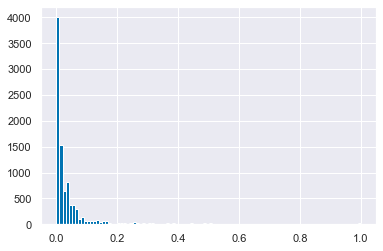

In [240]:
(df_mod1_matches/CSES_1_obj.shape[0]).stack().replace(0.0,np.nan).hist(bins=100)
#.value_counts().head(50)

In [271]:
( (df_mod1_matches/CSES_1_obj.shape[0])>.5 ).sum().sort_values().replace(0,np.nan).dropna()

A1003      1.0
A1005      1.0
A1004      1.0
A5062      1.0
A1015      1.0
          ... 
A1012_1    5.0
A1011_3    5.0
A1011_2    5.0
A1012_3    5.0
A5032_1    5.0
Length: 69, dtype: float64

In [263]:
df_mod1_matches["A5032_1"].sort_values().tail(18)

IMD3009_E     3301
IMD3008_D     3383
IMD3008_E     3920
IMD5012_A     4738
IMD5018_4     7938
IMD3015_A     9658
IMD5016_3    14228
IMD5016_2    18882
IMD5018_3    19122
IMD5050_3    19511
IMD5050_2    19511
IMD5050_1    19511
IMD5018_2    26989
IMD1010_1    34059
IMD1010_2    36722
IMD1010_3    43201
IMD5018_1    58250
IMD5016_1    58563
Name: A5032_1, dtype: int64

In [265]:
# what do these multiple matches mean on CONTENTS?

# because of "99. MISSING" instances! - replace with np.nan so they don't match!

( (df_mod1_matches/CSES_1_obj.shape[0])>.5 ).sum().sort_values()

# A3034_D    18

df_mod1_matches["A1025"].sort_values().tail(18)


CSES_1_obj["A5032_1"].value_counts()

1            59259
91. OTHER     2048
2             1102
Name: A5032_1, dtype: int64

In [31]:
((df_mod1_matches/CSES_1.shape[0])>.3).sum().sort_values().tail(80)

A2001       1
A1009       1
A1027       1
A3023       1
A5027_1     1
           ..
A1011_1     6
A1011_3     6
A5025_1     7
A1011_2     9
A5032_1    11
Length: 80, dtype: int64

In [ ]:
CSES_1

In [24]:
# CSES_int_mod1["IMD5016_1"].value_counts()

In [25]:
# CSES_int_mod4["IMD3009_F"].replace("99. MISSING",np.nan).value_counts()

In [26]:
# int_mod_vc = CSES_int_mod4.stack().value_counts()

In [27]:
# int_mod_vc.head(50)

In [30]:
(((df_mod1_matches/CSES_1.shape[0])>.2).sum()==1).sum()

56

In [36]:
df_mod1_matches[df_mod1_matches.columns[(((df_mod1_matches/CSES_1.shape[0])>.2).sum()==1)]].idxmax()

A1003            IMD1003
A1004            IMD1004
A1005            IMD1005
A1006            IMD1006
A1006_UN      IMD1006_UN
A1006_NAM    IMD1006_NAM
A1009        IMD1008_RES
A1015            IMD1009
A1022            IMD1015
A1027          IMD1013_D
A2001          IMD2001_1
A2002            IMD2002
A2004            IMD2004
A2012            IMD2006
A2022            IMD2007
A2026          IMD1014_1
A3001            IMD3010
A3012          IMD3005_4
A3023          IMD3013_1
A3024          IMD3013_2
A3025          IMD3013_3
A4002          IMD5024_3
A5002_E        IMD5011_E
A5004_A        IMD5012_A
A5004_B        IMD5012_B
A5004_C        IMD5012_C
A5004_D        IMD5012_D
A5004_E        IMD5012_E
A5004_F        IMD5012_F
A5005_A        IMD5001_A
A5005_B        IMD5001_B
A5005_C        IMD5001_C
A5005_D        IMD5001_D
A5005_E        IMD5001_E
A5005_F        IMD5001_F
A5006_A        IMD5002_A
A5006_B        IMD5002_B
A5006_C        IMD5002_C
A5006_D        IMD5002_D
A5006_E        IMD5002_E


In [45]:
df_mod1_matches["A1008"].sort_values()

IMD1001             0
IMD5008_1           0
IMD5008_2           0
IMD5009_1           0
IMD5009_2           0
                ...  
IMD1012_Y        8430
IMD1013_Y       54842
IMD1008_YEAR    62409
IMD1011_Y       62409
IMD5025_3       62409
Name: A1008, Length: 276, dtype: int64

In [40]:
CSES_1["A1008"]

0        1996
1        1996
2        1996
3        1996
4        1996
         ... 
62404    1996
62405    1996
62406    1996
62407    1996
62408    1996
Name: A1008, Length: 62409, dtype: int16

In [43]:
CSES_int["IMD1008_YEAR"][CSES_int["IMD1008_MOD_1"]=="01. IN CSES MODULE 1"]

2522      1996
2523      1996
2524      1996
2525      1996
2526      1996
          ... 
273481    1996
273482    1996
273483    1996
273484    1996
273485    1996
Name: IMD1008_YEAR, Length: 62409, dtype: int16

In [ ]:
### Three different attempts to find a shortcut to match variables between modules/modules & integrated version

# (1) VARIABLE NAMES - IMD1002_DOI/A1002_DO1/E1002_D01 ... sometimes they are the same, sometimes they refer to different things
# (2) VARIABLE LABELS - variable_labels seem to match okay - but they aren't complete
# (3) VARIABLE CONTENTS - matching the contents seems to work - except when they differ for some reason, or match multiple columns ...

In [ ]:
###

# so we want to build a dataframe

# (1) keyed by IMD variables, with each module 1-4 variable linked, via each approach
# e.g. one column for the linkage structure from (3), one for (2), one for (1)
# one column with IMD variable label

# then fill in last column manually




# then look at the values in modules *not linked* - hopefully small enough set to link to each other?



In [ ]:
# step one, build an IMD to MOD1-5 variable matching dataframe, dump to csv

# (1) needs to contain matches on variable header name for the int to each module
# (2) matches on contents (full list, but also highest match)
# (3) we will need to do manual filling on gaps / when variables are int-only/dataset-specific
# (4) then we need to store transform dicts for each int_mod variable pair with discrepancies

# basic goal -> convert mods 1-4 into integrated version (should be identical)
# secondary goal -> convert mod 5 into additional part of integrated version
    # check whether the conversion dicts *are unique*
    # check whether conversion correct *for all instances of a value*
# tertiary goal -> catalogue variables on mods *not* incldued in integrated version

In [114]:
# x = [1,7,.1,.5,6]
# sorted(x,reverse=True)
# del x

In [146]:
def get_matches(x,cses):
    size = cses.shape[0]
    match_dict = {y:x[y]/size for y in x.index if x[y]>(.2*size)}
    
    return pd.Series(match_dict).sort_index().sort_values(ascending=False,kind='heapsort').to_dict()
#     match_dict = {(x[y]/cses.shape[0]):x.index[y] for y in range(x.shape[0]) if x[y]>(.2*cses.shape[0])}
#     return {k:match_dict[k] for k in sorted(list(match_dict.keys()),reverse=True) }

In [147]:
# df_mod1_matches.T[["IMD1008_YEAR"]].apply(lambda x: get_matches(x,CSES_1))

In [148]:
# %%time
Int_variable_df = pd.DataFrame(index = df_mod1_matches.index)

Int_variable_df["description"] = [headerINT[x] for x in Int_variable_df.index]

Int_variable_df["20% matching contents_A"] = df_mod1_matches.T.apply(lambda x: get_matches(x,CSES_1))
# apply(lambda x: {(x[y]/CSES_1.shape[0]):x.index[y] for y in range(x.shape[0]) if x[y]>(.2*CSES_1.shape[0])})
Int_variable_df["20% matching contents(length)_A"] = Int_variable_df["20% matching contents_A"].apply(lambda x: len(x))
Int_variable_df["Top Score_A"] = Int_variable_df["20% matching contents_A"].apply(lambda x: x[list(x.keys())[0]] if len(x)>0 else np.nan)
Int_variable_df["Top Match_A"] = Int_variable_df["20% matching contents_A"].apply(lambda x: list(x.keys())[0] if len(x)>0 else np.nan)

Int_variable_df["20% matching contents_B"] = df_mod2_matches.T.apply(lambda x: get_matches(x,CSES_2))
Int_variable_df["20% matching contents(length)_B"] = Int_variable_df["20% matching contents_B"].apply(lambda x: len(x))
Int_variable_df["Top Score_B"] = Int_variable_df["20% matching contents_B"].apply(lambda x: x[list(x.keys())[0]] if len(x)>0 else np.nan)
Int_variable_df["Top Match_B"] = Int_variable_df["20% matching contents_B"].apply(lambda x: list(x.keys())[0] if len(x)>0 else np.nan)

Int_variable_df["20% matching contents_C"] = df_mod3_matches.T.apply(lambda x: get_matches(x,CSES_3))
Int_variable_df["20% matching contents(length)_C"] = Int_variable_df["20% matching contents_C"].apply(lambda x: len(x))
Int_variable_df["Top Score_C"] = Int_variable_df["20% matching contents_C"].apply(lambda x: x[list(x.keys())[0]] if len(x)>0 else np.nan)
Int_variable_df["Top Match_C"] = Int_variable_df["20% matching contents_C"].apply(lambda x: list(x.keys())[0] if len(x)>0 else np.nan)

Int_variable_df["20% matching contents_D"] = df_mod4_matches.T.apply(lambda x: get_matches(x,CSES_4))
Int_variable_df["20% matching contents(length)_D"] = Int_variable_df["20% matching contents_D"].apply(lambda x: len(x))
Int_variable_df["Top Score_D"] = Int_variable_df["20% matching contents_D"].apply(lambda x: x[list(x.keys())[0]] if len(x)>0 else np.nan)
Int_variable_df["Top Match_D"] = Int_variable_df["20% matching contents_D"].apply(lambda x: list(x.keys())[0] if len(x)>0 else np.nan)

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [149]:
# Int_variable_df


# mod_var = "A1008"
# mod_no = mod_dict[mod_var[0]]
# int_var = "IMD1008_YEAR"

# cses_discrepancies(mod_no,mod_var,int_var)

# df_mod1_matches.loc["IMD1008_YEAR",:].sort_values()

In [123]:
# df_mod1_matches[df_mod1_matches.columns[(((df_mod1_matches/CSES_1.shape[0])>.2).sum()>0)]]#.T.apply(lambda x: [y.index for y in x if y>0])
# Int_variable_df["20% matching contents"]#.sort_values().tail(50)

In [124]:
# df_mod1_matches.columns[(((df_mod1_matches/CSES_1.shape[0])>.2).sum()>0)]

In [150]:
# df here is from the variable description area
description_overlap = set(df.index).intersection(set(Int_variable_df["description"]))

variable_descr_matches = df.loc[sorted(description_overlap)].reset_index().set_index("IMD")[["A","B","C","D","E"]]
variable_descr_matches.columns = ["var_descr_"+x for x in variable_descr_matches]

Int_variable_df[variable_descr_matches.columns] = variable_descr_matches

In [151]:

# Int_variable_df.apply(lambda x: x["Top Match_A"]!=x["var_descr_A"] if pd.notnull(x["Top Match_A"])&pd.notnull(x["var_descr_A"]) else np.nan ,axis=0)


# Int_variable_df["Match_A_discrepancy"] = Int_variable_df["Top Match_A"]!=Int_variable_df["var_descr_A"]

In [152]:
def get_discrepancy(x, mod):
    var1 = "Top Match_A".replace("A",mod)
    var2 = "var_descr_A".replace("A",mod)
    if pd.isnull(x[var1]) or pd.isnull(x[var2]):
        return np.nan
    else:
        return x[var1]!=x[var2]


Int_variable_df["Match_A_discrepancy"] = Int_variable_df.apply(lambda x: get_discrepancy(x, "A"),axis=1)
Int_variable_df["Match_B_discrepancy"] = Int_variable_df.apply(lambda x: get_discrepancy(x, "B"),axis=1)
Int_variable_df["Match_C_discrepancy"] = Int_variable_df.apply(lambda x: get_discrepancy(x, "C"),axis=1)
Int_variable_df["Match_D_discrepancy"] = Int_variable_df.apply(lambda x: get_discrepancy(x, "D"),axis=1)

In [51]:
Int_variable_df.columns

Index(['description', '20% matching contents_A',
       '20% matching contents(length)_A', 'Top Match_A', 'Top Score_A',
       '20% matching contents_B', '20% matching contents(length)_B',
       'Top Match_B', 'Top Score_B', '20% matching contents_C',
       '20% matching contents(length)_C', 'Top Match_C', 'Top Score_C',
       '20% matching contents_D', '20% matching contents(length)_D',
       'Top Match_D', 'Top Score_D', 'var_descr_A', 'var_descr_B',
       'var_descr_C', 'var_descr_D', 'var_descr_E', 'Match_A_discrepancy',
       'Match_B_discrepancy', 'Match_C_discrepancy', 'Match_D_discrepancy'],
      dtype='object')

In [52]:
Int_variable_df['Top Score_A']

IMD1001             NaN
IMD1002_VER         NaN
IMD1002_DOI         NaN
IMD1003        0.847346
IMD1004        1.000000
                 ...   
IMD5057_3           NaN
IMD5058_1           NaN
IMD5058_2           NaN
IMD5059_1           NaN
IMD5059_2           NaN
Name: Top Score_A, Length: 276, dtype: float64

In [153]:
Int_variable_df.to_csv(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"Int_variable_df_fixed.csv")

In [255]:
Int_variable_df_fi = pd.read_csv(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"Int_variable_df_filledin.csv")

In [272]:
def cses_discrepancies(mod_var,int_var):
    CSES_dict = {"1":CSES_1,"2":CSES_2,"3":CSES_3,"4":CSES_4,}
    mod_dict = {"A":"1","B":"2","C":"3","D":"4"}
    mod_no = mod_dict[mod_var[0]]

    discrepancies = (CSES_dict[mod_no].reset_index().drop("index",axis=1).astype('object')[mod_var]) !=\
        (CSES_int[CSES_int["IMD1008_MOD_"+mod_no]=="01. IN CSES MODULE "+mod_no].reset_index().drop("index",axis=1).astype('object')[int_var])

    
    temp = CSES_dict[mod_no][discrepancies][mod_var]
    if temp.dtype.name=="category":
        temp = temp.cat.remove_unused_categories()
#     temp = temp.value_counts().reset_index()

    temp2 = CSES_int[CSES_int["IMD1008_MOD_"+mod_no]=="01. IN CSES MODULE "+mod_no].reset_index()[discrepancies][int_var]
    if temp2.dtype.name=="category":
        temp2 = temp2.cat.remove_unused_categories()
#     temp2 =temp2.value_counts().reset_index()
    temp = pd.concat([temp,temp2],axis=1)
#     temp["N"] = 1
    #.apply(lambda x: x[0]+"|->|"+x[1],axis=1).value_counts().reset_index().set_index(0)
#     ["index"]
#     .apply(lambda x: pd.Series(x.split("|->|")))

#     temp = pd.concat([temp,temp2],axis=1)
#     temp.columns = [mod_var,mod_var+"_count",int_var,int_var+"_count"]


    temp["N"] = 1
    temp = temp.groupby([mod_var,int_var]).sum()
    temp = temp.dropna().reset_index()
    temp["N"]=temp["N"].astype(int)
    temp=temp.sort_values(by="N",ascending=False)
    
    
    return temp
# temp.set_index("A1003")["IMD1003"].to_dict()

# temp




In [172]:
mod_var = "D3005_LH"
int_var = "IMD3001"

cses_discrepancies(mod_var,int_var)

,D3005_LH,IMD3001,N
4,5. RESPONDENT DID NOT CAST A BALLOT,0. RESPONDENT DID NOT CAST A BALLOT,9797
16,9. MISSING,1. RESPONDENT CAST A BALLOT,4335
20,9. MISSING,9999999. MISSING,2260
15,9. MISSING,0. RESPONDENT DID NOT CAST A BALLOT,942
8,6. VOLUNTEERED: RESPONDENT NOT REGISTERED ON E...,9999993. VOLUNTEERED: RESPONDENT NOT REGISTERE...,574
10,7. VOLUNTEERED: REFUSED,9999997. VOLUNTEERED: REFUSED,351
5,5. RESPONDENT DID NOT CAST A BALLOT,1. RESPONDENT CAST A BALLOT,280
9,7. VOLUNTEERED: REFUSED,1. RESPONDENT CAST A BALLOT,137
12,8. VOLUNTEERED: DON'T KNOW,1. RESPONDENT CAST A BALLOT,137
14,8. VOLUNTEERED: DON'T KNOW,9999998. VOLUNTEERED: DON'T KNOW,113


In [175]:
mod_var = "D3005_PR_2"
mod_no = mod_dict[mod_var[0]]
int_var = "IMD3001_PR_2"

cses_discrepancies(mod_no,mod_var,int_var)

,D3005_PR_2,IMD3001_PR_2,N
5,9. MISSING,9999996. NOT APPLICABLE: NO PRESIDENTIAL ELECT...,36838
4,9. MISSING,9999995. NOT APPLICABLE: NO ROLE OF PRESIDENT,27912
6,9. MISSING,9999999. MISSING,1586
0,5. RESPONDENT DID NOT CAST A BALLOT,0. RESPONDENT DID NOT CAST A BALLOT,1182
3,8. VOLUNTEERED: DON'T KNOW,9999998. VOLUNTEERED: DON'T KNOW,94
2,7. VOLUNTEERED: REFUSED,9999997. VOLUNTEERED: REFUSED,80
1,6. VOLUNTEERED: RESPONDENT NOT REGISTERED ON E...,9999993. VOLUNTEERED: RESPONDENT NOT REGISTERE...,2


In [177]:
mod_var = "D3006_LH_PL"
mod_no = mod_dict[mod_var[0]]
int_var = "IMD3002_LH_PL"

cses_discrepancies(mod_no,mod_var,int_var)

# not totally clear how to easily translate the party numbers not in the favoured set of A...I

# only an issue for mod 4 ... which is covered by IMD
# mod 5 lists the party explicitly

,D3006_LH_PL,IMD3002_LH_PL,N
453,99. MISSING,9999995. NOT APPLICABLE: NOT A LIST SYSTEM,27168
455,99. MISSING,9999999. MISSING/ABSTAINED (DID NOT VOTE),8805
451,97. VOLUNTEERED: REFUSED,9999997. VOLUNTEERED: REFUSED,2565
452,98. VOLUNTEERED: DON'T KNOW,9999998. VOLUNTEERED: DON'T KNOW,2120
454,99. MISSING,9999996. NOT APPLICABLE: NO LOWER HOUSE ELECTION,1937
...,...,...,...
287,11,7640015. THA - Great People Party,1
387,27,6080037. PHL - Ang National Coalition of Indig...,1
297,12,4280043. LVA - Growth,1
298,12,6080022. PHL - Anti-Crime and Terrorism Commun...,1


In [225]:
mod_var = "D3025_4_A_PT"
mod_no = mod_dict[mod_var[0]]
int_var = "IMD3015_A"

cses_discrepancies(mod_no,mod_var,int_var)

# problem with numeric/explicit party ref

,D3025_4_A_PT,IMD3015_A,N
0,1. CORRECT,9. MISSING,1835
2,7. VOLUNTEERED: REFUSED,9. MISSING,341
3,8. VOLUNTEERED: DON'T KNOW,9. MISSING,295
1,5. INCORRECT,9. MISSING,234


In [236]:
mod_var = "B5006"
mod_no = mod_dict[mod_var[0]]
int_var = "IMD5006_1"

cses_discrepancies(mod_no,mod_var,int_var)


# Electoral turnout (IMD: %of registered electorate)
# all off by small amounts???

# even more off if you compare with % of voting age population ...

,B5006,IMD5006_1,N
19,79.10,79.08,3023
20,82.30,68.72,2514
25,91.90,91.63,2225
16,75.50,75.48,2052
24,88.71,88.66,2032
23,87.10,87.15,2026
4,56.64,999. MISSING,1977
6,58.50,58.51,1913
1,46.29,46.18,1794
26,94.82,94.32,1769


In [240]:
mod_var = "C5008"
mod_no = mod_dict[mod_var[0]]
int_var = "IMD5008_1"

cses_discrepancies(mod_no,mod_var,int_var)

,C5008,IMD5008_1,N
38,97. NOT APPLICABLE,9999997. NOT APPLICABLE,15625
2,1,1240002. CAN - Conservative Party,4495
32,7,6160009. POL - Democratic Left Alliance,2402
11,1,5280001. NLD - Christian Democratic Appeal,2359
27,4,5280001. NLD - Christian Democratic Appeal,2153
6,1,2760002. DEU - Christian Democratic Party,2095
23,3,2760004. DEU - Social Democratic Party,2018
40,99. MISSING,9999997. NOT APPLICABLE,2015
28,5,5780007. NOR - Christian People's Party,2012
33,9,2030001. CZE - Czech Social Democratic Party,2002


In [241]:
mod_var = "D5008"
mod_no = mod_dict[mod_var[0]]
int_var = "IMD5008_1"

cses_discrepancies(mod_no,mod_var,int_var)

,D5008,IMD5008_1,N
34,97. NOT APPLICABLE - PRESIDENTIAL REGIME,9999997. NOT APPLICABLE,18003
16,2,1240002. CAN - Conservative Party,4202
15,2,0360003. AUS - Australian Labor Party,3953
33,89. INDEPENDENT (NON-PARTY CANDIDATE),9999989. INDEPENDENT CANDIDATE,3682
1,1,1240002. CAN - Conservative Party,3458
9,1,6420011. ROU - Social Liberal Union,2283
29,7,2500001. FRA - Union for a Popular Movement,2014
4,1,3920001. JPN - Liberal Democratic Party,1937
7,1,6160001. POL - Civic Platform,1919
18,2,2760002. DEU - Christian Democratic Party,1889


In [254]:
mod_var = "B5033_1"
mod_no = mod_dict[mod_var[0]]
int_var = "IMD5027"

cses_discrepancies(mod_no,mod_var,int_var)

,B5033_1,IMD5027,N
8,299,603,3023
9,300,480,1977
1,69,120,1741
7,243,299,1500
6,225,450,1496
10,617,630,1439
4,176,386,1200
5,212,237,1200
3,100,140,1116
2,88,90,1002


In [238]:
CSES_1["A5031"].value_counts().sort_index()
# CSES_1["A1008"].reset_index()["A1008"]== CSES_int[CSES_int["IMD1008_MOD_1"]=="01. IN CSES MODULE 1"]["IMD1008_YEAR"].reset_index()["IMD1008_YEAR"]

1. YES; STRICTLY ENFORCED SANCTIONS        6197
2. YES; WEAKLY ENFORCED SANCTIONS          1173
4. YES; WITHOUT SANCTION FOR VIOLATION     5900
5. NO                                     47179
9. MISSING                                 1960
Name: A5031, dtype: int64

In [251]:
# CSES_1["A3023"]
CSES_int[CSES_int["IMD1008_MOD_1"]=="01. IN CSES MODULE 1"]["IMD5022_1"].value_counts()

# BUGGED!

99.00 MISSING                                       62409
96.00 OTHER THRESHOLD [SEE ELECTION STUDY NOTES]        0
17.0                                                    0
16.67                                                   0
10.0                                                    0
5.0                                                     0
4.0                                                     0
3.0                                                     0
2.0                                                     0
0.7                                                     0
00.00 THERE IS NO THRESHOLD                             0
Name: IMD5022_1, dtype: int64

In [47]:
mod_no = str(1)

mod_var = "A1003"
int_var = "IMD1003"

cses_discrepancies(mod_no,mod_var,int_var)

,A1003,IMD1003,N
1,5611999. BELGIUM-FLANDERS (1999),05611999. BELGIUM-FLANDERS (1999),2179
2,5621999. BELGIUM-WALLOONS (1999),05621999. BELGIUM-WALLONIA (1999),1960
3,64301999. RUSSIAN FEDERATION (1999),64301999. RUSSIA (1999),1842
0,3601996. AUSTRALIA (1996),03601996. AUSTRALIA (1996),1798
4,64302000. RUSSIAN FEDERATION (2000),64302000. RUSSIA (2000),1748


In [48]:
mod_no = str(2)

mod_var = "B1003"
int_var = "IMD1003"

cses_discrepancies(mod_no,mod_var,int_var)

,B1003,IMD1003,N
0,10002001. BULGARIA (2001),10002001. BULGARIA(2001),1482


In [49]:
mod_no = str(4)

mod_var = "D1003"
int_var = "IMD1003"

cses_discrepancies(mod_no,mod_var,int_var)

,D1003,IMD1003,N
1,42802012. MEXICO (2012),48402012. MEXICO (2012),2400
0,40402011. LATVIA (2011),42802011. LATVIA (2011),1004


In [50]:
mod_no = str(2)

mod_var = "B1016"
int_var = "IMD1011_M"

cses_discrepancies(mod_no,mod_var,int_var)

,B1016,IMD1011_M,N
4,5. MAY,05. MAY,9672
6,7. JULY,07. JULY,8825
7,9. SEPTEMBER,09. SEPTEMBER,8511
3,4. APRIL,04. APRIL,7171
2,3. MARCH,03. MARCH,7030
5,6. JUNE,06. JUNE,4104
1,2. FEBRUARY,02. FEBRUARY,2801
0,1. JANUARY,01. JANUARY,1212


In [51]:
mod_no = str(3)

mod_var = "C1016"
int_var = "IMD1011_M"

cses_discrepancies(mod_no,mod_var,int_var)

,C1016,IMD1011_M,N
5,9. SEPTEMBER,09. SEPTEMBER,17207
3,6. JUNE,06. JUNE,8467
0,3. MARCH,03. MARCH,6592
1,4. APRIL,04. APRIL,6453
2,5. MAY,05. MAY,6087
4,7. JULY,07. JULY,5364


In [52]:
mod_no = str(4)

mod_var = "D1016"
int_var = "IMD1011_M"

cses_discrepancies(mod_no,mod_var,int_var)

# this looks like an actual fuck-up!

,D1016,IMD1011_M,N
0,02. FEBRUARY,05. MAY,3458
1,05. MAY,06. JUNE,1029


In [53]:
mod_no = str(1)

mod_var = "A1017"
int_var = "IMD1011_D"

cses_discrepancies(mod_no,mod_var,int_var)

# this looks like an actual fuck-up!

,A1017,IMD1011_D,N
2,28,27,2019
0,11,3,1212
1,12,23,1200


In [54]:
mod_no = str(4)

mod_var = "D1017"
int_var = "IMD1011_D"

cses_discrepancies(mod_no,mod_var,int_var)

# this looks like an actual fuck-up!

,D1017,IMD1011_D,N
0,5,2,3458
1,6,17,1029


In [55]:
mod_no = str(4)

mod_var = "D1018"
int_var = "IMD1011_Y"

cses_discrepancies(mod_no,mod_var,int_var)

# this looks like an actual fuck-up!

,D1018,IMD1011_Y,N


In [154]:
mod_no = str(1)

mod_var = "A1019"
int_var = "IMD1012_M"

cses_discrepancies(mod_no,mod_var,int_var)

# this looks like an actual fuck-up!

,A1019,IMD1012_M,N
0,00. NOT APPLICABLE; NO SECOND ROUND ELECTIONS,96. NOT APPLICABLE: NO SECOND ROUND,51797


In [57]:
mod_var = "B1019"
mod_no = mod_dict[mod_var[0]]
int_var = "IMD1012_M"

cses_discrepancies(mod_no,mod_var,int_var)

,B1019,IMD1012_M,N
4,99. MISSING,96. NOT APPLICABLE: NO SECOND ROUND,54397
3,6. JUNE,06. JUNE,2032
0,1. JANUARY,01. JANUARY,1200
1,4. APRIL,96. NOT APPLICABLE: NO SECOND ROUND,1200
2,5. MAY,05. MAY,1000


In [58]:
mod_var = "B1020"
int_var = "IMD1012_D"

mod_no = mod_dict[mod_var[0]]
cses_discrepancies(mod_no,mod_var,int_var)

# weird

,B1020,IMD1012_D,N
1,99. MISSING,96. NOT APPLICABLE: NO SECOND ROUND,54397
0,21,96. NOT APPLICABLE: NO SECOND ROUND,1200


In [59]:
mod_var = "C1026"
int_var = "IMD1013_M"

mod_no = mod_dict[mod_var[0]]
cses_discrepancies(mod_no,mod_var,int_var)

# weird

,C1026,IMD1013_M,N
5,6. JUNE,06. JUNE,13464
6,7. JULY,07. JULY,8901
3,4. APRIL,04. APRIL,3598
4,5. MAY,05. MAY,3493
7,8. AUGUST,08. AUGUST,3314
2,3. MARCH,03. MARCH,3085
8,9. SEPTEMBER,09. SEPTEMBER,2176
0,1. JANUARY,01. JANUARY,1435
1,2. FEBRUARY,02. FEBRUARY,1204


In [155]:
mod_var = "A2026"
int_var = "IMD1014_1"

mod_no = mod_dict[mod_var[0]]
cses_discrepancies(mod_no,mod_var,int_var)

# weird

,A2026,IMD1014_1,N
668,999. MISSING,9999. MISSING,9927
58,14,9999. MISSING,574
85,21,9999. MISSING,566
83,21,9,486
30,10,11,304
...,...,...,...
285,60,71,1
281,60,37,1
527,217,132,1
280,60,36,1


In [61]:
mod_var = "A1022"
int_var = "IMD1015"

mod_no = mod_dict[mod_var[0]]
cses_discrepancies(mod_no,mod_var,int_var)

# weird

,A1022,IMD1015,N
0,3. BETWEEN ROUNDS OF MAJORITARIAN ELECTION,3. BETWEEN ROUNDS,3816


In [318]:
mod_var = "A2003"
int_var = "IMD2003"

cses_discrepancies(mod_var,int_var)

# weird

,A2003,IMD2003,N,A2003_N
3,4. INCOMPLETE SECONDARY,1. PRIMARY EDUCATION/LOWER SECONDARY EDUCATION,13578,13578
4,5. SECONDARY COMPLETED,2. HIGHER SECONDARY EDUCATION,12514,12514
2,3. PRIMARY COMPLETED,1. PRIMARY EDUCATION/LOWER SECONDARY EDUCATION,9714,9714
5,6. POST-SECONDARY TRADE,3. POST-SECONDARY (NON-UNIVERSITY) EDUCATION,9658,9658
7,8. UNIVERSITY UNDERGRADUATE DEGREE COMPLETED,4. UNIVERSITY EDUCATION,8583,8583
6,7. UNIVERSITY UNDERGRADUATE DEGREE INCOMPLETE,2. HIGHER SECONDARY EDUCATION,3402,3402
1,2. INCOMPLETE PRIMARY,0. NONE (NO EDUCATION) / ILLITERATE,3259,3259
0,1. NONE,0. NONE (NO EDUCATION) / ILLITERATE,838,838


In [164]:
mod_var = "D2004"
int_var = "IMD2004"

mod_no = mod_dict[mod_var[0]]
cses_discrepancies(mod_no,mod_var,int_var)


,D2004,IMD2004,N
0,3. DIVORCED OR SEPARATED,3. DIVORCED OR SEPARATED (MARRIED BUT SEPARATE...,5538
1,7. REFUSED,7. VOLUNTEERED: REFUSED,295
2,8. DON'T KNOW,8. VOLUNTEERED: DON'T KNOW,72


In [165]:
mod_var = "A2017"
int_var = "IMD2005"

mod_no = mod_dict[mod_var[0]]
cses_discrepancies(mod_no,mod_var,int_var)


,A2017,IMD2005,N
0,01. ROMAN CATHOLIC,1. CATHOLIC,18643
35,99. REFUSED,99. MISSING,13040
32,83. NONE,12. NON-BELIEVERS,8756
16,17. EASTERN ORTHODOX (GREEK RITE CATHOLIC),3. ORTHODOX/EASTERN CATHOLIC CHURCHES,5416
1,"02. PROTESTANT, NO DENOMINATION GIVEN",2. PROTESTANT,2686
3,"04. EPISCOPALIAN, CHURCHES OF ENGLAND OR IRELAND",2. PROTESTANT,2614
21,40. BUDDHIST,8. BUDDHISM,1441
12,13. PRESBYTERIAN,2. PROTESTANT,1388
29,80. OTHER RELIGIONS,96. OTHER: NOT SPECIFIED,1224
31,82. ATHEISTS,12. NON-BELIEVERS,1160


In [317]:
mod_var = "B2025"
int_var = "IMD2005"

mod_no = mod_dict[mod_var[0]]
cses_discrepancies(mod_var,int_var)

## and so on for other modules!

,B2025,IMD2005,N,B2025_N
0,1. ROMAN CATHOLIC,1. CATHOLIC,22115,22115
37,93. NONE,12. NON-BELIEVERS,5940,5940
14,17. EASTERN ORTHODOX CHURCH,3. ORTHODOX/EASTERN CATHOLIC CHURCHES,3810,3810
22,40. BUDDHIST,8. BUDDHISM,3173,3173
19,"30. MUSLIM, MOHAMMEDAN, ISLAM",7. ISLAM - OTHER,2797,2797
1,"2. PROTESTANT, NO DENOMINATION GIVEN",2. PROTESTANT,2728,2728
15,18. CHRISTIAN (NO DENOMINATION GIVEN),4. OTHER CHRISTIAN (NO DENOMINATION GIVEN; IND...,1236,1236
29,80. [SEE VARIABLE NOTES],96. OTHER: NOT SPECIFIED,1221,1221
3,"4. EPISCOPALIAN, ANGLICAN",2. PROTESTANT,1199,1199
17,20. JEWISH,5. JEWISH,1151,1151


In [66]:
mod_var = "B2030"
int_var = "IMD2007"

mod_no = mod_dict[mod_var[0]]
cses_discrepancies(mod_no,mod_var,int_var)


,B2030,IMD2007,N
1,8. DON'T KNOW,8. VOLUNTEERED: DON'T KNOW,79
0,7. REFUSED,7. VOLUNTEERED: REFUSED,19


In [67]:
mod_var = "C2030"
int_var = "IMD2007"

mod_no = mod_dict[mod_var[0]]
cses_discrepancies(mod_no,mod_var,int_var)


,C2030,IMD2007,N
1,8. DON'T KNOW,8. VOLUNTEERED: DON'T KNOW,47
0,7. REFUSED,7. VOLUNTEERED: REFUSED,39


In [68]:
mod_var = "A2012"
int_var = "IMD2006"

mod_no = mod_dict[mod_var[0]]
cses_discrepancies(mod_no,mod_var,int_var)


,A2012,IMD2006,N
0,8. DON'T KNOW,8. VOLUNTEERED: DON'T KNOW,2347


In [69]:
mod_var = "B2020"
int_var = "IMD2006"

mod_no = mod_dict[mod_var[0]]
cses_discrepancies(mod_no,mod_var,int_var)


,B2020,IMD2006,N
3,8. DON'T KNOW,8. VOLUNTEERED: DON'T KNOW,3779
1,7. REFUSED,7. VOLUNTEERED: REFUSED,2741
2,7. REFUSED,9. MISSING,425
0,6. [SEE VARIABLE NOTES],6. [SEE ELECTION STUDY NOTES],4


In [315]:
mod_var = "C2020"
int_var = "IMD2006"

mod_no = mod_dict[mod_var[0]]
cses_discrepancies(mod_var,int_var)


,C2020,IMD2006,N,C2020_N
1,7. REFUSED,7. VOLUNTEERED: REFUSED,4296,4296
2,8. DON'T KNOW,8. VOLUNTEERED: DON'T KNOW,2769,2769
0,6. [SEE VARIABLE NOTES],6. [SEE ELECTION STUDY NOTES],71,71


In [316]:
mod_var = "D2020"
int_var = "IMD2006"

mod_no = mod_dict[mod_var[0]]
cses_discrepancies(mod_var,int_var)


,D2020,IMD2006,N,D2020_N
0,7. REFUSED,7. VOLUNTEERED: REFUSED,8785,8785
1,8. DON'T KNOW,8. VOLUNTEERED: DON'T KNOW,4805,4805


In [169]:
CSES_1["A2012"]

0                                  9. MISSING
1        5. HIGHEST HOUSEHOLD INCOME QUINTILE
2         4. FOURTH HOUSEHOLD INCOME QUINTILE
3          3. THIRD HOUSEHOLD INCOME QUINTILE
4          3. THIRD HOUSEHOLD INCOME QUINTILE
                         ...                 
62404      3. THIRD HOUSEHOLD INCOME QUINTILE
62405     4. FOURTH HOUSEHOLD INCOME QUINTILE
62406    5. HIGHEST HOUSEHOLD INCOME QUINTILE
62407                              9. MISSING
62408      3. THIRD HOUSEHOLD INCOME QUINTILE
Name: A2012, Length: 62409, dtype: category
Categories (7, object): [1. LOWEST HOUSEHOLD INCOME QUINTILE < 2. SECOND HOUSEHOLD INCOME QUINTILE < 3. THIRD HOUSEHOLD INCOME QUINTILE < 4. FOURTH HOUSEHOLD INCOME QUINTILE < 5. HIGHEST HOUSEHOLD INCOME QUINTILE < 8. DON'T KNOW < 9. MISSING]

In [171]:
CSES_5["E2010"]

0                                 9. MISSING
1                                 9. MISSING
2                                 9. MISSING
3                                 9. MISSING
4                                 9. MISSING
                        ...                 
35160     3. THIRD HOUSEHOLD INCOME QUINTILE
35161    4. FOURTH HOUSEHOLD INCOME QUINTILE
35162                7. VOLUNTEERED: REFUSED
35163    1. LOWEST HOUSEHOLD INCOME QUINTILE
35164    1. LOWEST HOUSEHOLD INCOME QUINTILE
Name: E2010, Length: 35165, dtype: category
Categories (9, object): [1. LOWEST HOUSEHOLD INCOME QUINTILE < 2. SECOND HOUSEHOLD INCOME QUINTILE < 3. THIRD HOUSEHOLD INCOME QUINTILE < 4. FOURTH HOUSEHOLD INCOME QUINTILE ... 6. [SEE ELECTION STUDY NOTES] < 7. VOLUNTEERED: REFUSED < 8. VOLUNTEERED: DON'T KNOW < 9. MISSING]

In [168]:
CSES_5["E2011"]

0                     99999999. MISSING
1                     99999999. MISSING
2                     99999999. MISSING
3                     99999999. MISSING
4                     99999999. MISSING
                      ...              
35160                                16
35161                                21
35162    99999997. VOLUNTEERED: REFUSED
35163                                 1
35164                                 1
Name: E2011, Length: 35165, dtype: category
Categories (496, object): [0 < 1 < 2 < 3 ... 5000000 < 99999997. VOLUNTEERED: REFUSED < 99999998. VOLUNTEERED: DON'T KNOW < 99999999. MISSING]

In [146]:
CSES_int[CSES_int["IMD1008_MOD_1"]=="01. IN CSES MODULE 1"]["IMD1014_1"].replace("9995. NOT ASCERTAINED",np.nan).replace("9999. MISSING",np.nan).astype(float).reset_index().drop("index",axis=1)

,IMD1014_1
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
62404,6.0
62405,11.0
62406,13.0
62407,34.0


In [150]:
(CSES_1["A2026"].replace("999. MISSING",np.nan).astype(float).reset_index().drop("index",axis=1)["A2026"] - CSES_int[CSES_int["IMD1008_MOD_1"]=="01. IN CSES MODULE 1"]["IMD1014_1"].replace("9995. NOT ASCERTAINED",np.nan).replace("9999. MISSING",np.nan).astype(float).reset_index().drop("index",axis=1)["IMD1014_1"]).value_counts()

 0.0      32193
 12.0      4080
-1.0       3490
-3.0       2090
 1.0       1182
 107.0     1182
-14.0      1170
-15.0       961
-2.0        846
-4.0        792
-5.0        484
-30.0       154
 2.0         26
-10.0        19
-9.0         15
 3.0         13
-8.0         10
-11.0        10
 106.0        7
 5.0          7
 7.0          7
-6.0          6
 4.0          6
 6.0          5
 10.0         5
 86.0         4
-12.0         4
-31.0         4
-7.0          3
 103.0        3
 100.0        3
 19.0         2
-19.0         2
-20.0         2
-24.0         1
 8.0          1
-92.0         1
-65.0         1
 11.0         1
 27.0         1
-45.0         1
 9.0          1
 23.0         1
 24.0         1
 17.0         1
 85.0         1
-17.0         1
 30.0         1
-34.0         1
-59.0         1
-18.0         1
dtype: int64

In [9]:
CSES_1["A2017"].value_counts()

01. ROMAN CATHOLIC                                        18643
99. REFUSED                                               13040
83. NONE                                                   8756
17. EASTERN ORTHODOX  (GREEK RITE CATHOLIC)                5416
02. PROTESTANT, NO DENOMINATION GIVEN                      2686
04. EPISCOPALIAN, CHURCHES OF ENGLAND OR IRELAND           2614
40. BUDDHIST                                               1441
13. PRESBYTERIAN                                           1388
80. OTHER RELIGIONS                                        1224
82. ATHEISTS                                               1160
20. JEWISH                                                 1028
18. CHRISTIAN  (NO DENOMINATION GIVEN)                      921
71. CONFUCIANISM                                            858
11. METHODIST                                               580
05. BAPTIST                                                 509
30. MUSLIM; MOHAMMEDAN; ISLAM  (NO DENOM

In [54]:
CSES_int[CSES_int["IMD1008_MOD_1"]=="01. IN CSES MODULE 1"]["IMD1007"].value_counts()

001. [SEE ELECTION STUDY NOTES]    58561
002. [SEE ELECTION STUDY NOTES]     2196
006. [SEE ELECTION STUDY NOTES]     1652
999. MISSING                           0
005. [SEE ELECTION STUDY NOTES]        0
004. [SEE ELECTION STUDY NOTES]        0
003. [SEE ELECTION STUDY NOTES]        0
Name: IMD1007, dtype: int64

In [56]:
CSES_1["A1007"].value_counts()

001. [SEE VARIABLE NOTES]    58561
002. [SEE VARIABLE NOTES]     2196
006. [SEE VARIABLE NOTES]     1652
Name: A1007, dtype: int64

In [90]:
CSES_int[CSES_int["IMD1008_MOD_1"]=="01. IN CSES MODULE 1"]["IMD1007"].value_counts()

001. [SEE ELECTION STUDY NOTES]    58561
002. [SEE ELECTION STUDY NOTES]     2196
006. [SEE ELECTION STUDY NOTES]     1652
999. MISSING                           0
005. [SEE ELECTION STUDY NOTES]        0
004. [SEE ELECTION STUDY NOTES]        0
003. [SEE ELECTION STUDY NOTES]        0
Name: IMD1007, dtype: int64

In [112]:
CSES_int[CSES_int["IMD1008_MOD_1"]=="01. IN CSES MODULE 1"]["IMD1012_D"].value_counts()

96. NOT APPLICABLE: NO SECOND ROUND    51797
24                                      1525
1                                       1229
23                                      1200
17                                      1175
16                                      1173
3                                       1118
28                                      1102
29                                      1081
4                                       1009
27                                         0
26                                         0
22                                         0
31                                         0
15                                         0
12                                         0
6                                          0
5                                          0
20                                         0
Name: IMD1012_D, dtype: int64

In [113]:
CSES_1["A1020"].value_counts()

00. NOT APPLICABLE; NO SECOND ROUND ELECTIONS    51797
24                                                1525
1                                                 1229
23                                                1200
17                                                1175
16                                                1173
3                                                 1118
28                                                1102
29                                                1081
4                                                 1009
Name: A1020, dtype: int64

In [93]:
CSES_2["B1016"].value_counts()

5. MAY          9672
7. JULY         8825
9. SEPTEMBER    8511
4. APRIL        7171
3. MARCH        7030
10. OCTOBER     6703
11. NOVEMBER    5005
6. JUNE         4104
12. DECEMBER    3222
2. FEBRUARY     2801
1. JANUARY      1212
Name: B1016, dtype: int64

In [ ]:
Int_variable_df_fi = Int_variable_df_fi.set_index("Unnamed: 0")

In [257]:
Int_variable_df_fi.columns

Index(['Unnamed: 0', 'description', '20% matching contents_A',
       '20% matching contents(length)_A', 'Top Score_A', 'Top Match_A',
       '20% matching contents_B', '20% matching contents(length)_B',
       'Top Score_B', 'Top Match_B', '20% matching contents_C',
       '20% matching contents(length)_C', 'Top Score_C', 'Top Match_C',
       '20% matching contents_D', '20% matching contents(length)_D',
       'Top Score_D', 'Top Match_D', 'var_descr_A', 'var_descr_B',
       'var_descr_C', 'var_descr_D', 'var_descr_E', 'Match_A_discrepancy',
       'Match_B_discrepancy', 'Match_C_discrepancy', 'Match_D_discrepancy',
       'INT_only', 'Dataset_specific', 'notes'],
      dtype='object')

In [277]:
def cses_discrepancies(mod_var,int_var):
    CSES_dict = {"1":CSES_1,"2":CSES_2,"3":CSES_3,"4":CSES_4,}
    mod_dict = {"A":"1","B":"2","C":"3","D":"4"}
    mod_no = mod_dict[mod_var[0]]

    discrepancies = (CSES_dict[mod_no].reset_index().drop("index",axis=1).astype('object')[mod_var]) !=\
        (CSES_int[CSES_int["IMD1008_MOD_"+mod_no]=="01. IN CSES MODULE "+mod_no].reset_index().drop("index",axis=1).astype('object')[int_var])

    
    temp = CSES_dict[mod_no][discrepancies][mod_var]
    if temp.dtype.name=="category":
        temp = temp.cat.remove_unused_categories()


    temp2 = CSES_int[CSES_int["IMD1008_MOD_"+mod_no]=="01. IN CSES MODULE "+mod_no].reset_index()[discrepancies][int_var]
    if temp2.dtype.name=="category":
        temp2 = temp2.cat.remove_unused_categories()
    temp = pd.concat([temp,temp2],axis=1)


    temp["N"] = 1
    temp = temp.groupby([mod_var,int_var]).sum()
    temp = temp.dropna().reset_index()
    temp["N"]=temp["N"].astype(int)
    temp=temp.sort_values(by="N",ascending=False)
    
    temp[mod_var+"_N"] = CSES_dict[mod_no][mod_var].value_counts().loc[temp[mod_var]].values
    
    
    return temp
# temp.set_index("A1003")["IMD1003"].to_dict()

# temp




In [407]:
mod_var = "D3025_4_A"
int_var = "IMD3015_4"

disc_df = cses_discrepancies(mod_var,int_var)
disc_df

# then check if mod_var column is

# no situations where *only some instances of category X map to Z* or *some values map to Z and some to Y*
# all(disc_df["N"]==disc_df[mod_var+"_N"])

# save mapping dictionary
# disc_df.set_index(mod_var)[int_var].to_dict()

,D3025_4_A,IMD3015_4,N,D3025_4_A_N
0,5. INCORRECT,0. INCORRECT,11547,11547
2,9. MISSING,1. CORRECT,1835,11456
3,9. MISSING,7. VOLUNTEERED: REFUSED,341,11456
4,9. MISSING,8. VOLUNTEERED: DON'T KNOW,295,11456
1,9. MISSING,0. INCORRECT,234,11456


In [397]:
CSES_4["D3012_A"].value_counts().sort_index()

00. STRONGLY DISLIKE                                    9823
1                                                       3643
2                                                       4057
3                                                       4404
4                                                       4410
5                                                       9860
6                                                       5151
7                                                       6792
8                                                       8248
9                                                       5460
10. STRONGLY LIKE                                       8406
96. HAVEN'T HEARD OF LEADER                              463
97. VOLUNTEERED: REFUSED                                1146
98. DON'T KNOW ENOUGH ABOUT/DON'T KNOW WHERE TO RATE    1905
99. MISSING                                             1790
Name: D3012_A, dtype: int64

In [344]:
CSES_1["A1017"].value_counts().sort_index()

1     2897
2     5415
3     1175
5     1534
6     5215
8     2749
9     2102
10    4230
11    3213
12    7661
13    5239
15    2055
17    1303
19    1842
20    2484
21    3012
24    3048
26    1748
28    2019
29    2239
31    1229
Name: A1017, dtype: int64

In [396]:
CSES_int[CSES_int["IMD1008_MOD_4"]=="01. IN CSES MODULE 4"]["IMD3009_A"].value_counts().sort_index()

00. STRONGLY DISLIKE                                    9819
1                                                       3642
2                                                       4046
3                                                       4396
4                                                       4412
5                                                       9815
6                                                       5148
7                                                       6788
8                                                       8281
9                                                       5473
10. STRONGLY LIKE                                       8436
96. HAVEN'T HEARD OF LEADER                              464
97. VOLUNTEERED: REFUSED                                1147
98. DON'T KNOW ENOUGH ABOUT/DON'T KNOW WHERE TO RATE    1901
99. MISSING                                             1790
Name: IMD3009_A, dtype: int64

In [347]:
%%time
mod_list = ["A","B","C","D"]

# initialise conversion/conversion_error columns
for mod in mod_list:
    Int_variable_df_fi["conversion_"+mod] = np.nan
    Int_variable_df_fi["conversion_error_"+mod] = np.nan


for int_var in Int_variable_df_fi.index:
    # integrated dataset variable (e.g. "IMD1003")
    if (Int_variable_df_fi.loc[int_var,"INT_only"]=="x") or (Int_variable_df_fi.loc[int_var,"Dataset_specific"]=="x"):
        continue
    
    for mod in mod_list:
        # get module variable (e.g "A1003")
        mod_var = Int_variable_df_fi.loc[int_var,"var_descr_"+mod]
        if pd.isnull(mod_var):
            continue
        disc_df = cses_discrepancies(mod_var,int_var)
        if disc_df.shape[0]==0:
            continue
        elif not all(disc_df["N"]==disc_df[mod_var+"_N"]):
            Int_variable_df_fi.loc[int_var,"conversion_error_"+mod]=mod_var
        else:
            Int_variable_df_fi.loc[int_var,"conversion_"+mod]=[disc_df.set_index(mod_var)[int_var].to_dict()]
            

Wall time: 34min 13s


In [324]:
# 30 rows -> 3 mins, 300 row -> 30 mins?

In [348]:
Int_variable_df_fi[['INT_only', 'Dataset_specific', 'notes', 'conversion_A',
       'conversion_error_A', 'conversion_B', 'conversion_error_B',
       'conversion_C', 'conversion_error_C', 'conversion_D',
       'conversion_error_D']]

,INT_only,Dataset_specific,notes,conversion_A,conversion_error_A,conversion_B,conversion_error_B,conversion_C,conversion_error_C,conversion_D,conversion_error_D
Unnamed: 0,,,,,,,,,,,
IMD1001,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IMD1002_VER,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IMD1002_DOI,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IMD1003,NaN,NaN,NaN,{'5611999. BELGIUM-FLANDERS (1999)': '05611999...,NaN,{'10002001. BULGARIA (2001)': '10002001. BULGA...,NaN,NaN,NaN,{'42802012. MEXICO (2012)': '48402012. MEXICO ...,NaN
IMD1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
IMD5057_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IMD5058_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'997. PRESIDENTIAL ELECTION ONLY - NOT CALCUL...,NaN
IMD5058_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'997. PRESIDENTIAL ELECTION ONLY - NOT CALCUL...,NaN


In [352]:
Int_variable_df_fi[search(Int_variable_df_fi,"error").index].notnull().sum()

conversion_error_A    44
conversion_error_B    76
conversion_error_C    82
conversion_error_D    64
dtype: int64

In [351]:
Int_variable_df_fi[search(Int_variable_df_fi,"error|var_descr_").index].loc[Int_variable_df_fi.index[Int_variable_df_fi[search(Int_variable_df_fi,"error").index].any(axis=1)]]

,var_descr_A,var_descr_B,var_descr_C,var_descr_D,var_descr_E,conversion_error_A,conversion_error_B,conversion_error_C,conversion_error_D
Unnamed: 0,,,,,,,,,
IMD1010_3,A1012_3,B1012_3,C1012_3,D1012_3,E1012_3,A1012_3,NaN,NaN,NaN
IMD1011_M,A1016,B1016,C1016,D1016,E1016,NaN,NaN,NaN,D1016
IMD1011_D,A1017,B1017,C1017,D1017,E1017,A1017,NaN,NaN,D1017
IMD1012_Y,A1021,B1021,C1021,D1021,E1021,NaN,B1021,NaN,NaN
IMD2003,A2003,B2003,C2003,D2003,E2003,NaN,B2003,C2003,NaN
...,...,...,...,...,...,...,...,...,...
IMD5054_1,NaN,NaN,C5085_1,D5085_1,E5099_1,NaN,NaN,C5085_1,NaN
IMD5055_1,NaN,NaN,C5083_1,D5083_1,E5097_1,NaN,NaN,C5083_1,D5083_1
IMD5055_2,NaN,NaN,C5083_2,D5083_2,E5097_2,NaN,NaN,C5083_2,NaN


In [328]:
Int_variable_df_fi[search(Int_variable_df_fi,"conversion_(A|B|C|D)").index].dropna(how='all')

,conversion_A,conversion_B,conversion_C,conversion_D
Unnamed: 0,,,,
IMD1007,{'001. [SEE VARIABLE NOTES]': '001. [SEE ELECT...,{'001. [SEE VARIABLE NOTES]': '001. [SEE ELECT...,{'001. [SEE VARIABLE NOTES]': '001. [SEE ELECT...,NaN
IMD1011_M,NaN,"{'5. MAY': '05. MAY', '7. JULY': '07. JULY', '...","{'9. SEPTEMBER': '09. SEPTEMBER', '6. JUNE': '...",NaN
IMD1012_M,{'00. NOT APPLICABLE; NO SECOND ROUND ELECTION...,{'99. MISSING': '96. NOT APPLICABLE: NO SECOND...,{'99. MISSING': '96. NOT APPLICABLE: NO SECOND...,{'99. MISSING': '96. NOT APPLICABLE: NO SECOND...
IMD1012_D,{'00. NOT APPLICABLE; NO SECOND ROUND ELECTION...,{'99. MISSING': '96. NOT APPLICABLE: NO SECOND...,{'99. MISSING': '96. NOT APPLICABLE: NO SECOND...,{'99. MISSING': '96. NOT APPLICABLE: NO SECOND...
IMD1012_Y,{'0000. NOT APPLICABLE; NO SECOND ROUND ELECTI...,NaN,{'9999. MISSING': '9996. NOT APPLICABLE: NO SE...,{'9999. MISSING': '9996. NOT APPLICABLE: NO SE...
IMD1013_M,NaN,"{'7. JULY': '07. JULY', '3. MARCH': '03. MARCH...","{'6. JUNE': '06. JUNE', '7. JULY': '07. JULY',...",NaN
IMD1015,{'3. BETWEEN ROUNDS OF MAJORITARIAN ELECTION':...,NaN,NaN,NaN
IMD1016_1,"{'1. PERSONAL': '1. FACE-TO-FACE', '3. SELF-AD...",{'5. COMBINATION OF FACE-TO-FACE AND SELF-ADMI...,{'4. COMBINATION OF TELEPHONE AND SELF-ADMINIS...,{'6. COMBINATION OF TELEPHONE AND SELF-ADMINIS...


In [360]:
Int_variable_df_fi["conversion_error_anywhere"] = Int_variable_df_fi[search(Int_variable_df_fi,"error").index].any(axis=1)

In [361]:
Int_variable_df_fi.to_csv(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"Int_variable_df_err.csv")